In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/stud_data.csv')

In [5]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [6]:
df.shape

(1000, 8)

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Gender - male/female

Race/Ethnicity - 'group B', 'group C', 'group A', 'group D', 'group E'

Parental Level Of Education - "bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'

Lunch - 'standard', 'free/reduced'

Test Prep Course - 'none', 'completed'

Missing Values Checking

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No Missing values

Check for duplicates

In [10]:
df.duplicated().sum()

0

No Duplicates present

Checking the number of unique values in each column

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

print(numeric_features)
print(categorical_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg_score'] = df['total_score']/3

In [15]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  avg_score  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

In [16]:
reading_full = df[df['reading score']==100]['avg_score'].count()
writing_full = df[df['writing score']==100]['avg_score'].count()
math_full = df[df['math score']==100]['avg_score'].count()

print("No of students having full marks in maths = ", math_full)
print("No of students having full marks in reading = ", reading_full)
print("No of students having full marks in writing = ", writing_full)

No of students having full marks in maths =  7
No of students having full marks in reading =  17
No of students having full marks in writing =  14


In [17]:
reading_fail = df[df['reading score']<=20]['avg_score'].count()
writing_fail = df[df['writing score']<=20]['avg_score'].count()
math_fail = df[df['math score']<=20]['avg_score'].count()

print("No of students having fail marks in maths = ", math_fail)
print("No of students having fail marks in reading = ", reading_fail)
print("No of students having fail marks in writing = ", writing_fail)

No of students having fail marks in maths =  4
No of students having fail marks in reading =  1
No of students having fail marks in writing =  3


DATA VISUALIZATION

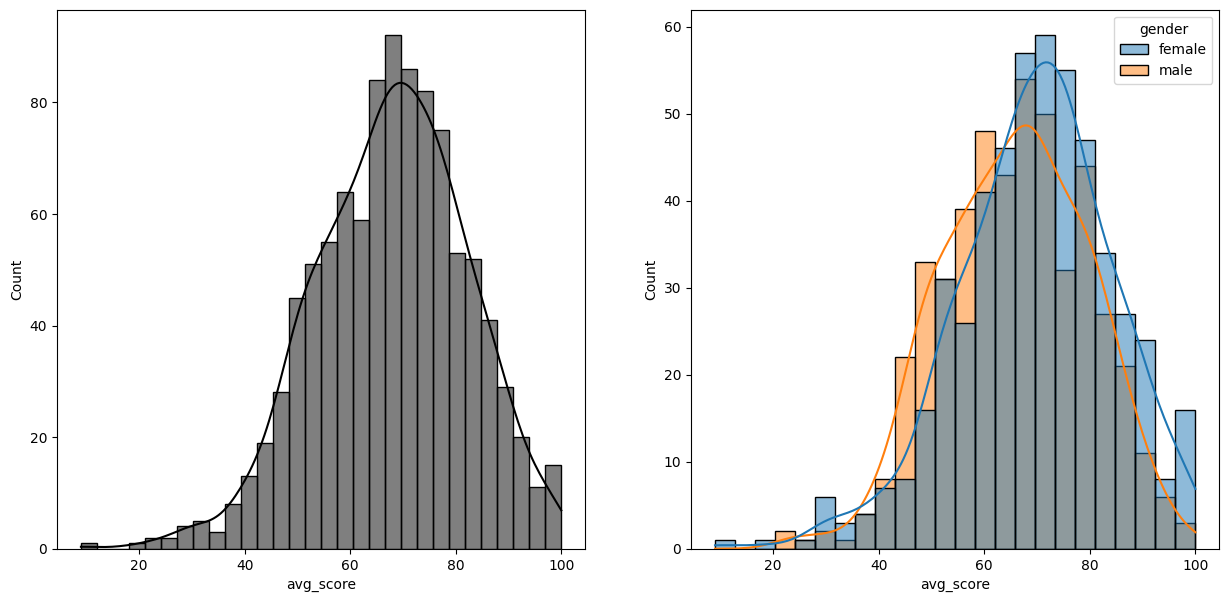

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'avg_score', bins = 30, kde = True, color='black')

plt.subplot(122)
sns.histplot(data = df, x = 'avg_score', kde = True, hue='gender')

plt.show()

Insight : Girls perform well than boys 

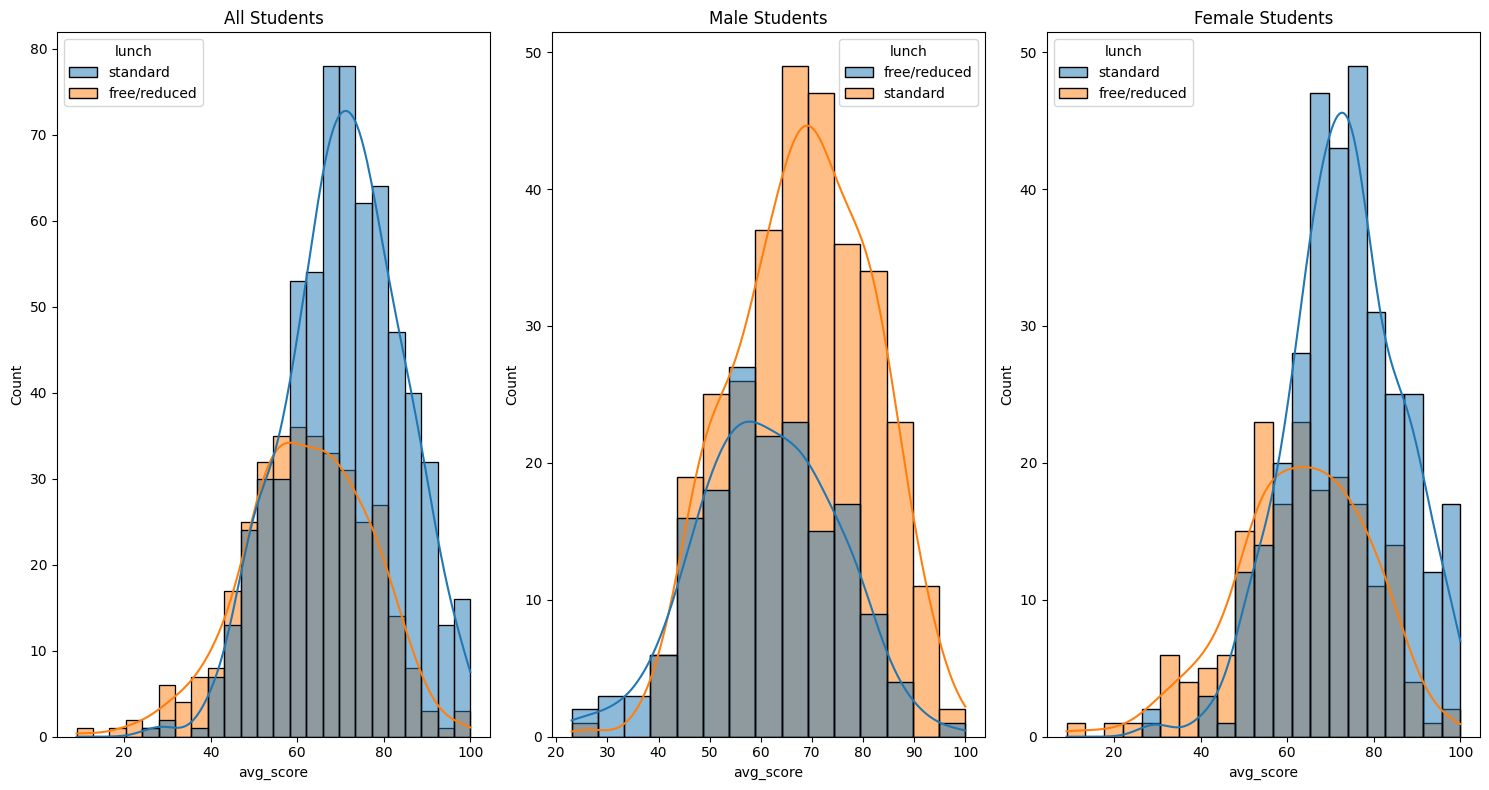

In [19]:
fig,axs = plt.subplots(nrows=1, ncols=3, figsize = (15,8))

plt.subplot(131)
sns.histplot(data=df, x='avg_score', kde=True, hue='lunch')
plt.title('All Students')

plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'], x = 'avg_score', kde=True, hue='lunch')
plt.title('Male Students')

plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'], x = 'avg_score', kde=True, hue='lunch')
plt.title('Female Students')

plt.tight_layout()
plt.show()

Insights:
Students who opted for standard meals performed better than those students who opted for free meals, in both boys and girls.

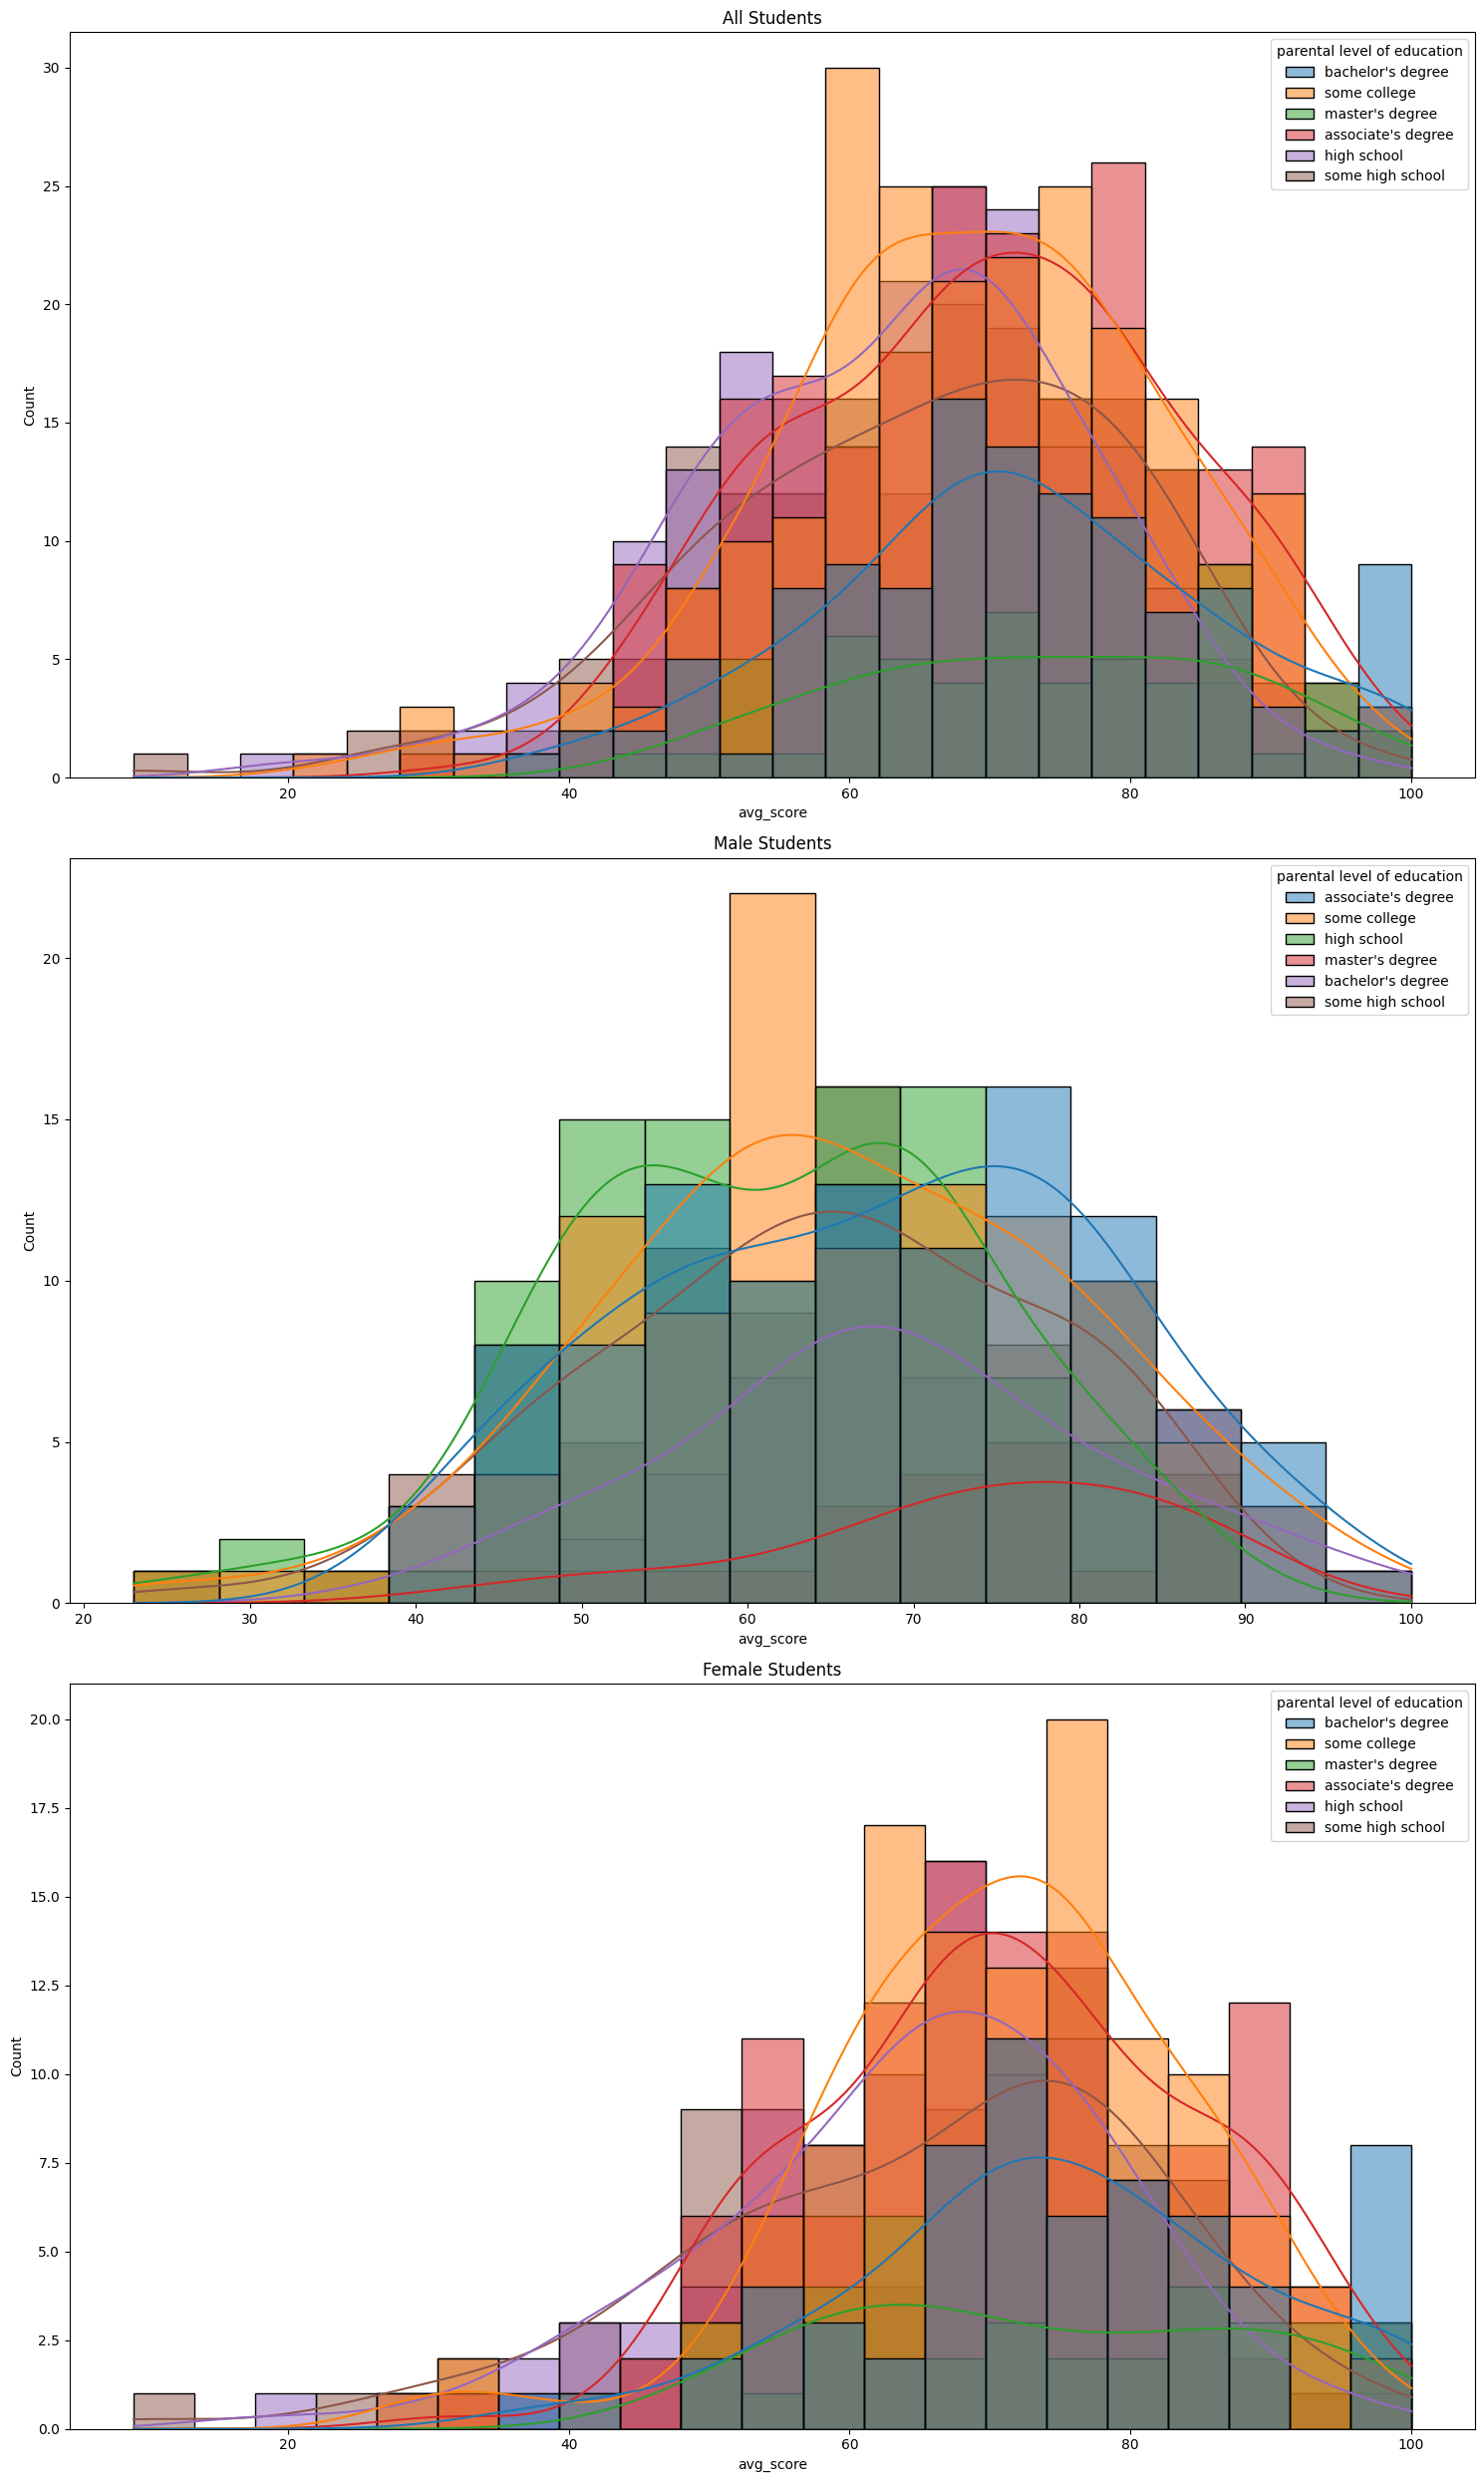

In [20]:
fig,axs = plt.subplots(nrows=3, ncols=1, figsize = (15,25))

plt.subplot(311)
sns.histplot(data=df, x='avg_score', kde=True, hue='parental level of education')
plt.title('All Students')

plt.subplot(312)
sns.histplot(data=df[df['gender']=='male'], x = 'avg_score', kde=True, hue='parental level of education')
plt.title('Male Students')

plt.subplot(313)
sns.histplot(data=df[df['gender']=='female'], x = 'avg_score', kde=True, hue='parental level of education')
plt.title('Female Students')

plt.tight_layout()
plt.show()

In General...There is no such correlation between parental education and marks.

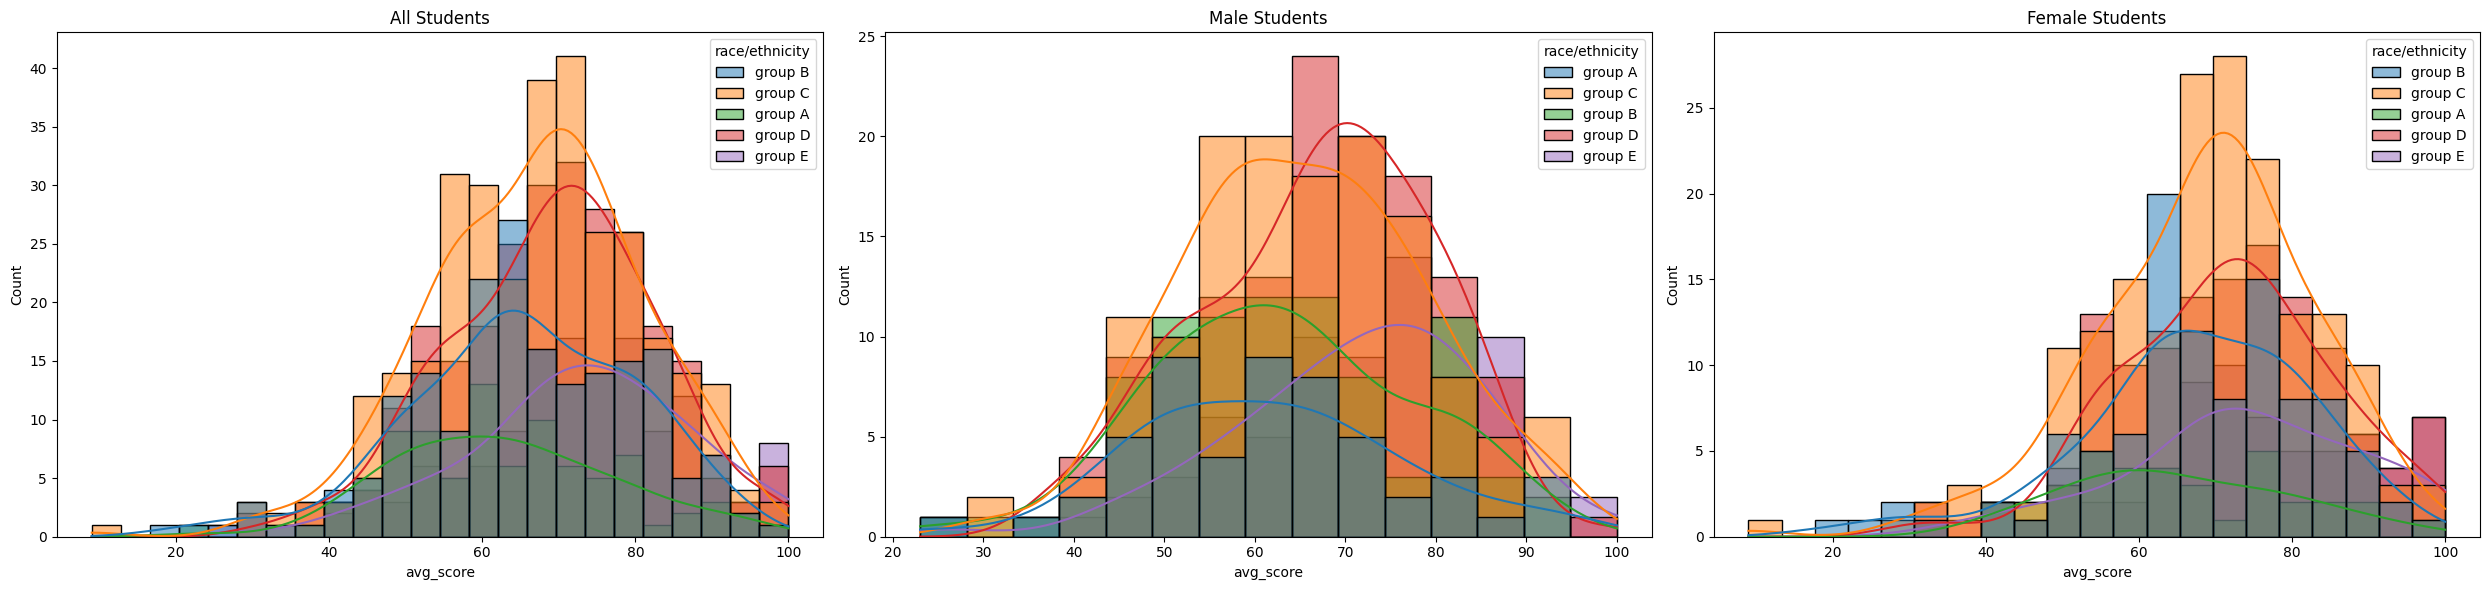

In [21]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='race/ethnicity')
plt.title('All Students')

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race/ethnicity')
plt.title('Male Students')

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race/ethnicity')
plt.title('Female Students')

plt.tight_layout()
plt.show()

Group C students generally perform well. Group A and Group B don't perform well in both boys and girls.

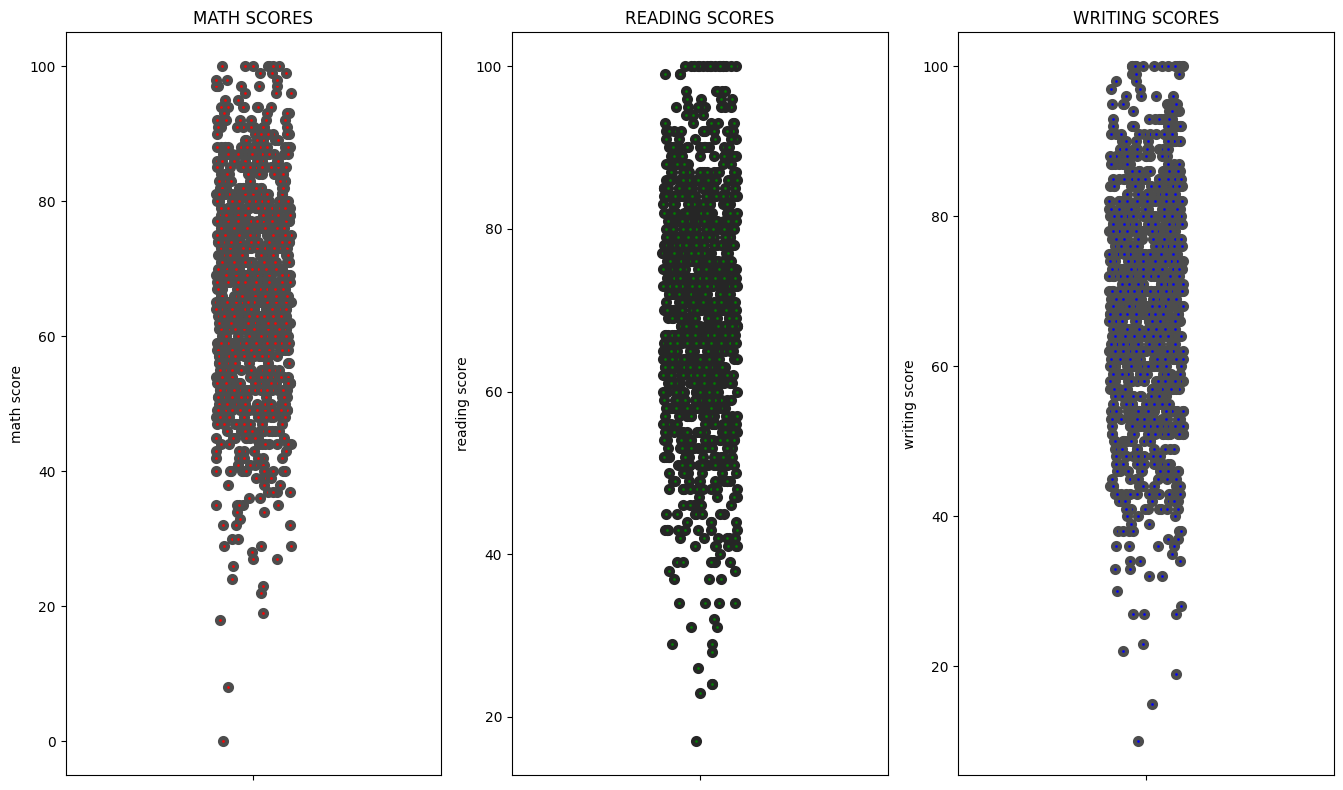

In [22]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.stripplot(y='math score',data=df,color='red',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.stripplot(y='reading score',data=df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.stripplot(y='writing score',data=df,color='blue',linewidth=3)

plt.tight_layout()
plt.show()

All three subjects have maximum probability of their scores between 50 and 80

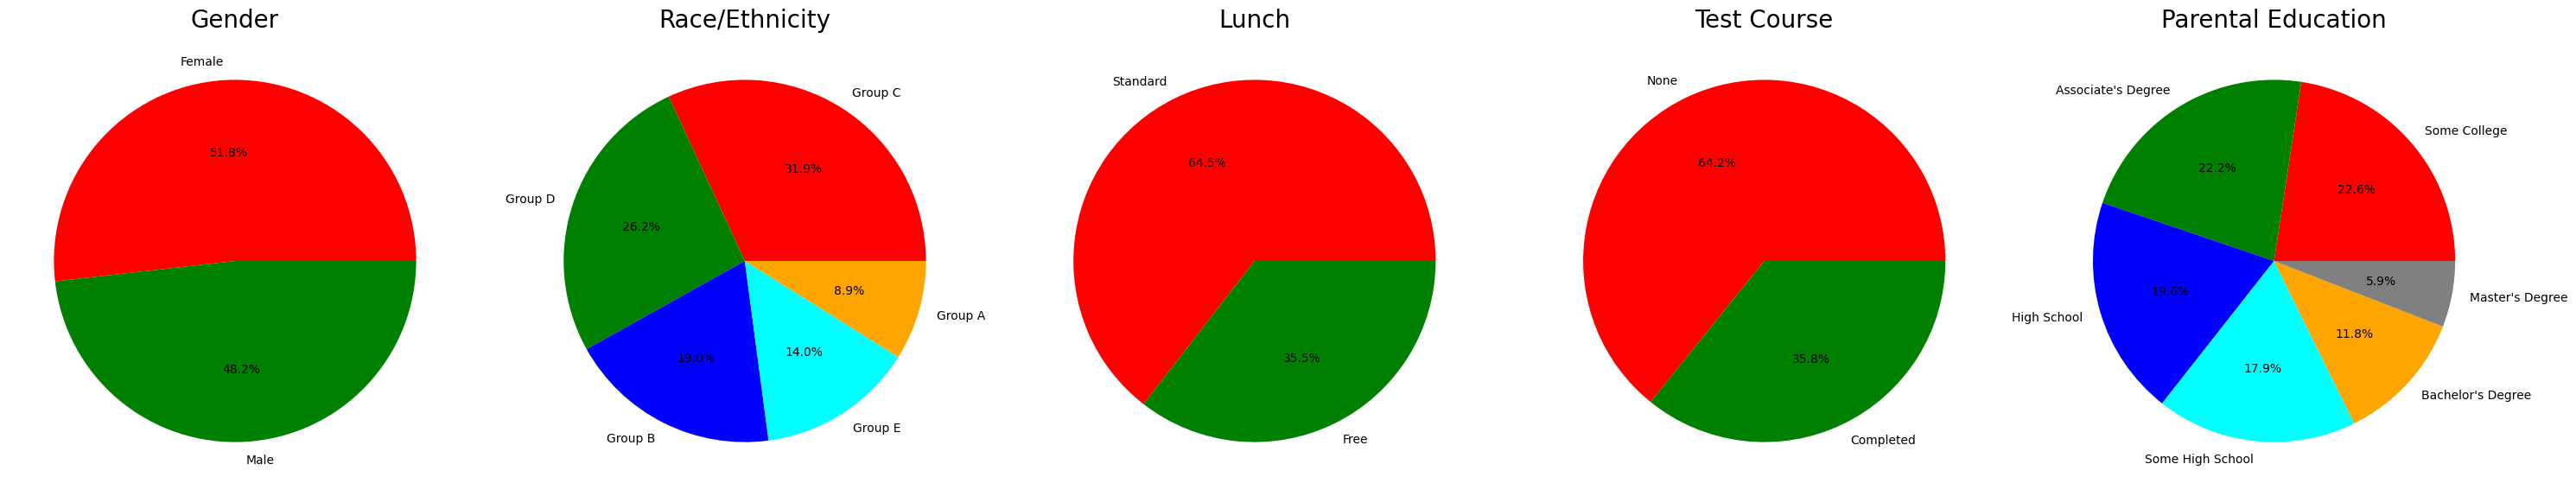

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)

#Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '%1.1f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

#Race / Ethnicity
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

#Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

#Test Preparation course
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

#Parental Level of Education
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

Univariate and Bivariate analysis of Gender with marks

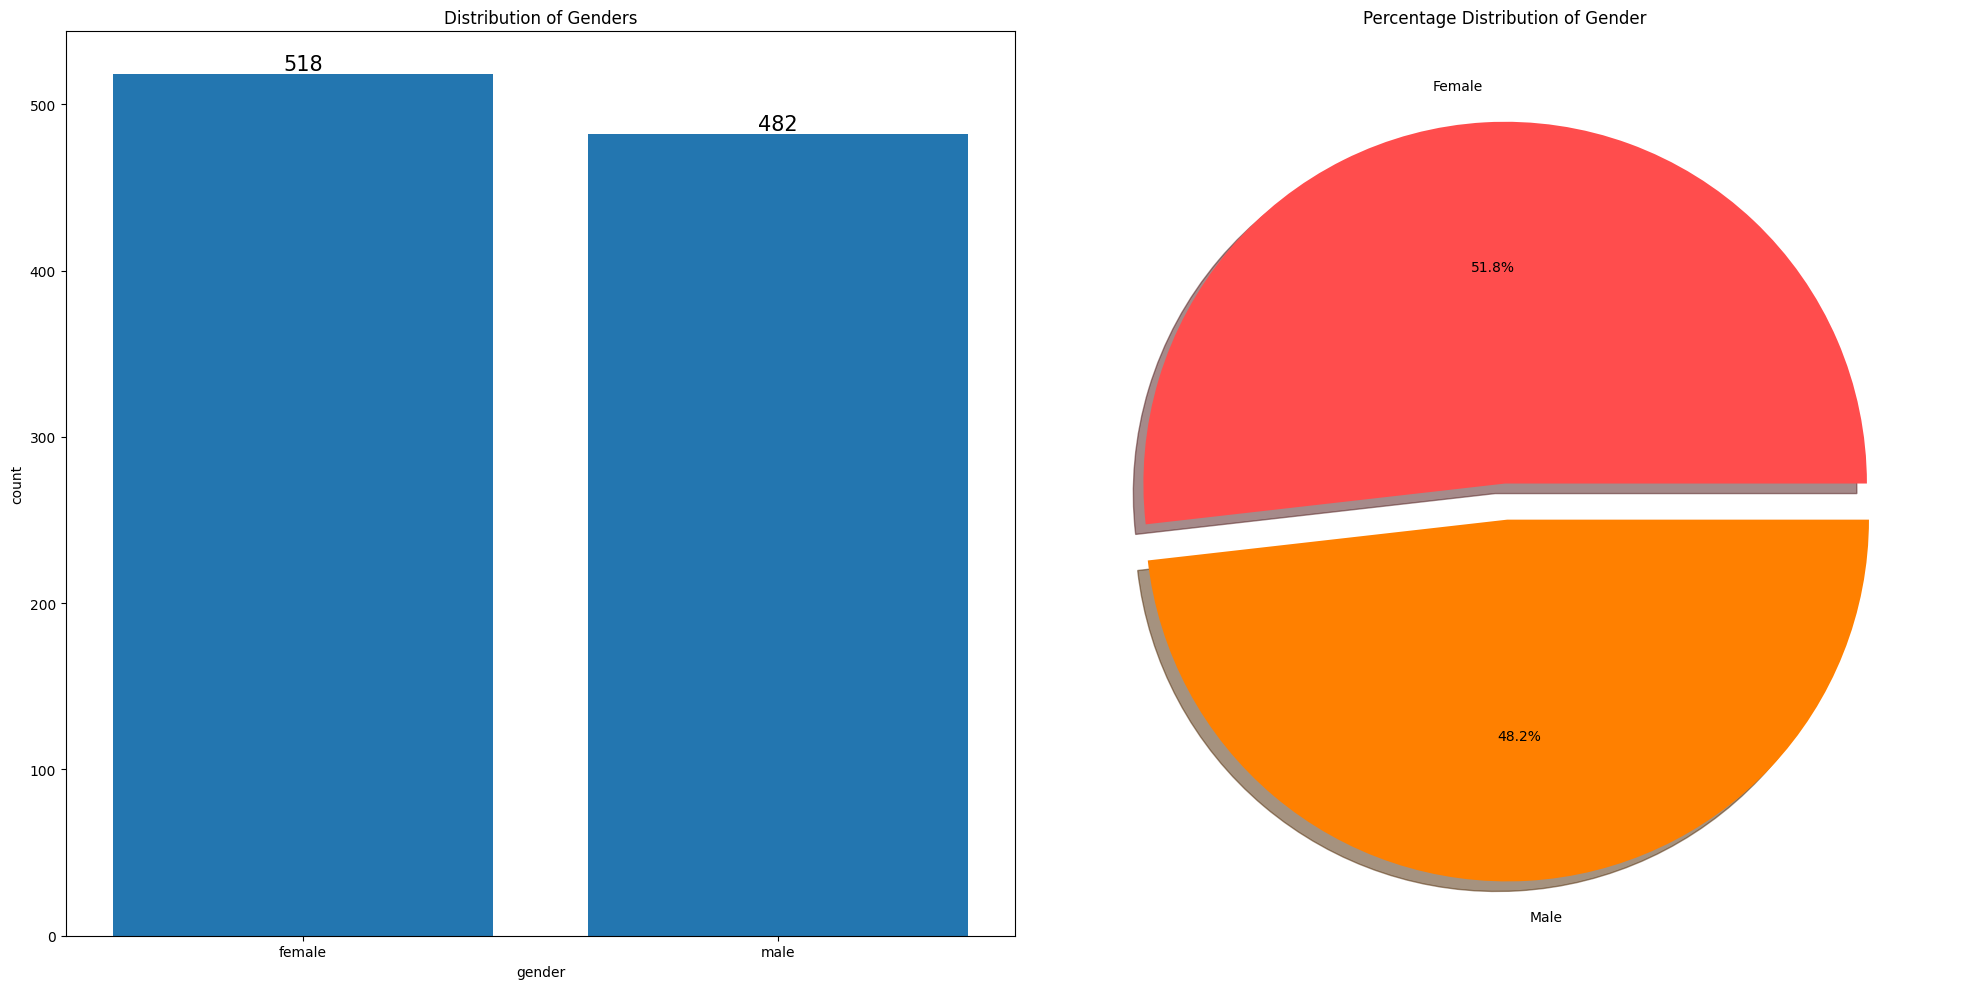

In [24]:
#Univariate analysis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

plt.subplot(121)
plt.title('Distribution of Genders')
sns.countplot(data=df, x='gender', saturation=0.95, ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

plt.subplot(122)
plt.title('Percentage Distribution of Gender')
plt.pie(x=df['gender'].value_counts(), data=df, labels=['Female', 'Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=['#ff4d4d','#ff8000'])

plt.tight_layout()
plt.show()

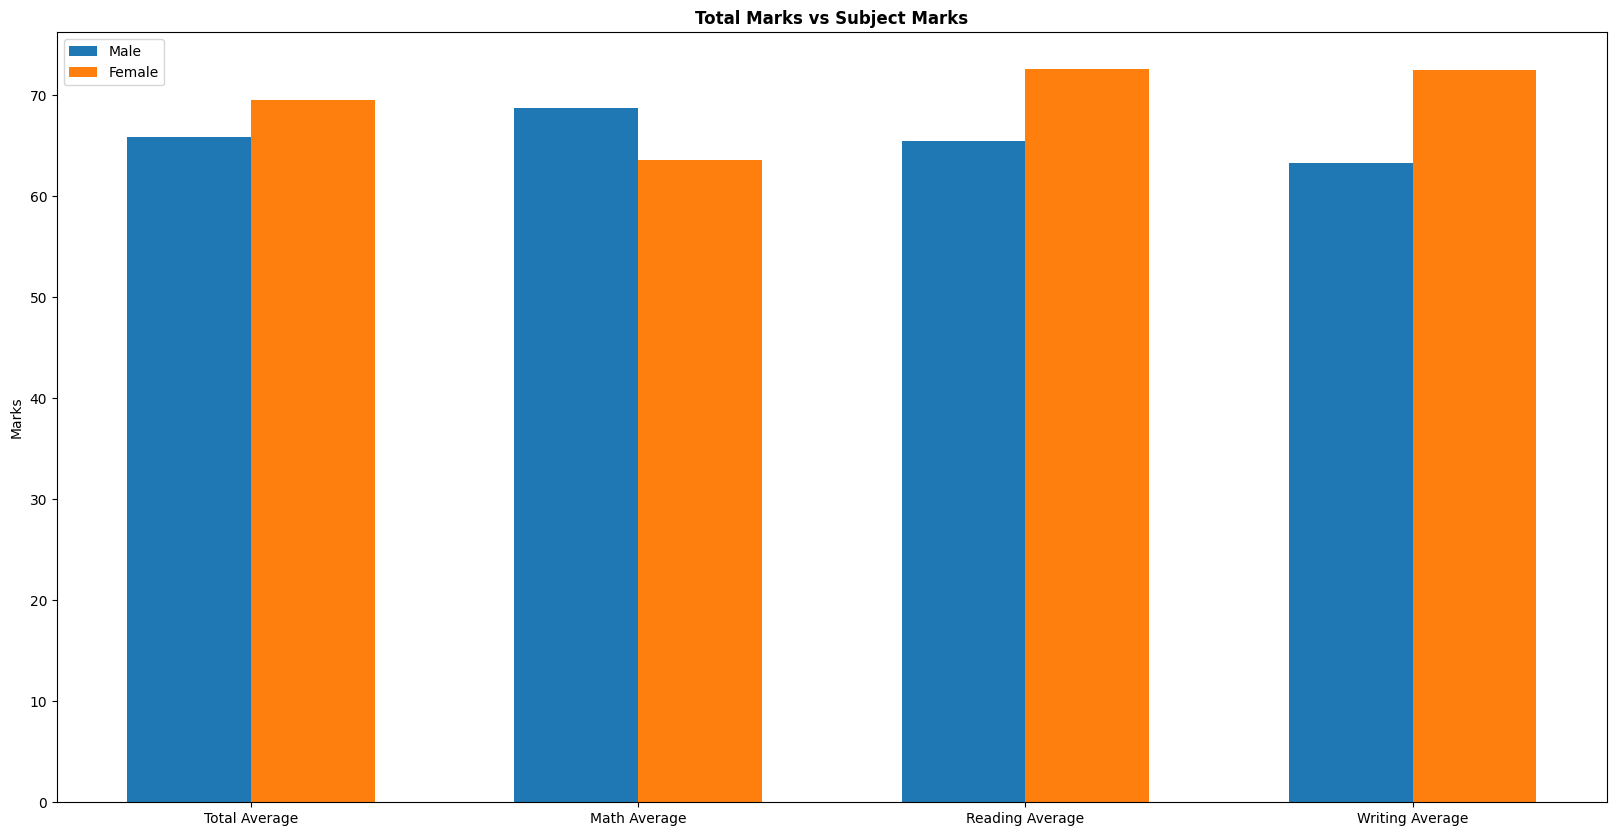

In [25]:
#Bivariate analysis
gender_group = df.groupby('gender')

plt.figure(figsize=(20,10))

X = ['Total Average', 'Math Average', 'Reading Average', 'Writing Average']

female_scores = [gender_group['avg_score'].mean()[0], gender_group['math score'].mean()[0], gender_group['reading score'].mean()[0], gender_group['writing score'].mean()[0]]
male_scores = [gender_group['avg_score'].mean()[1], gender_group['math score'].mean()[1], gender_group['reading score'].mean()[1], gender_group['writing score'].mean()[1]]

X_axis = np.arange(len(X))*2.5
plt.bar(X_axis - 0.4, male_scores, label='Male')
plt.bar(X_axis + 0.4, female_scores, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title('Total Marks vs Subject Marks', fontweight='bold')
plt.legend()
plt.show()

Females score more than males in total, reading and writing, whereas males score more in maths

Univariate and Bivariate analysis of race with marks

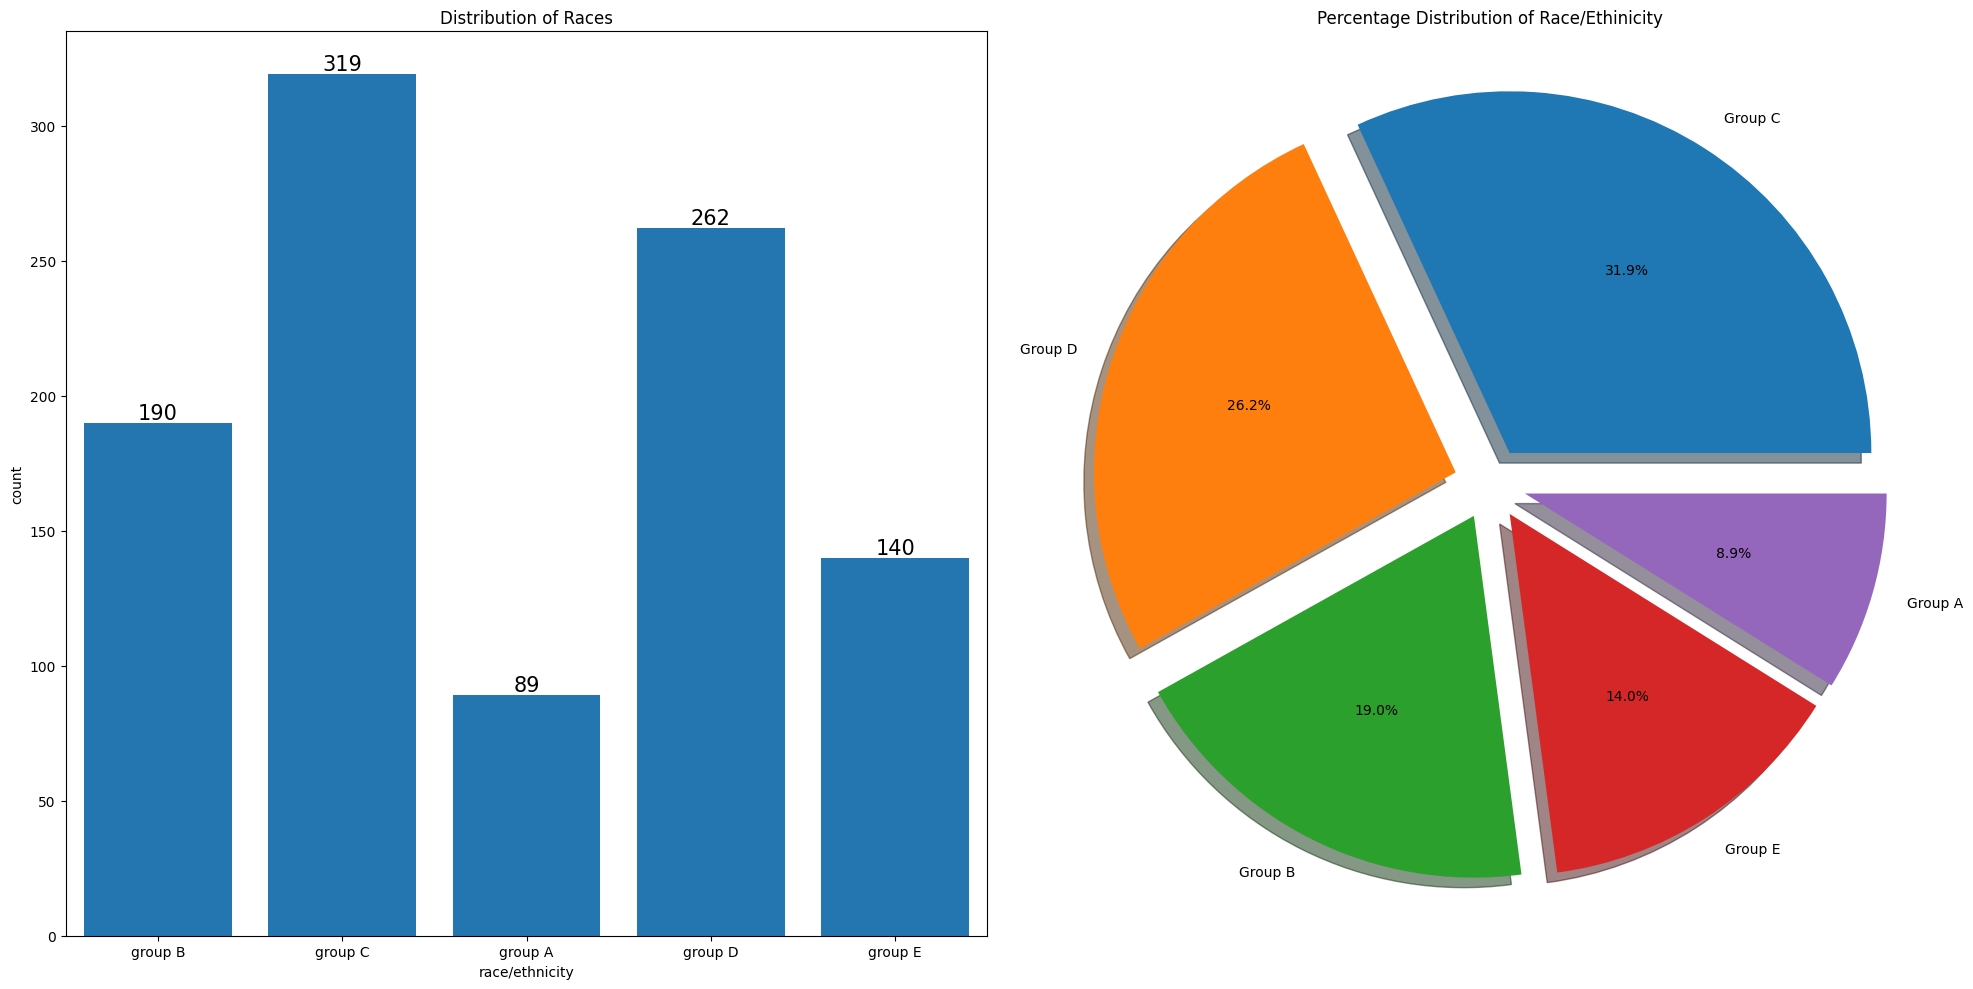

In [26]:
#Univariate analysis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

plt.subplot(121)
plt.title('Distribution of Races')
sns.countplot(data=df, x=df['race/ethnicity'], saturation=0.95, ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

plt.subplot(122)
plt.title('Percentage Distribution of Race/Ethinicity')
plt.pie(x=df['race/ethnicity'].value_counts(), data=df, labels=['Group C', 'Group D', 'Group B', 'Group E', 'Group A'],explode=[0.1, 0.1, 0.1, 0.1, 0.1],autopct='%1.1f%%',shadow=True)

plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

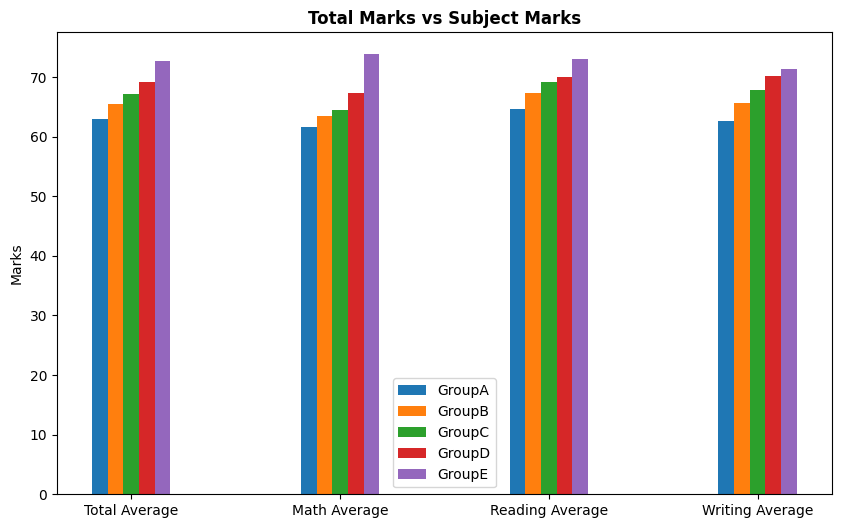

In [27]:
#Bivariate analysis
racial_group = df.groupby('race/ethnicity')

plt.figure(figsize=(20,10))

X = ['Total Average', 'Math Average', 'Reading Average', 'Writing Average']

groupA_scores = [racial_group['avg_score'].mean()[0], racial_group['math score'].mean()[0], racial_group['reading score'].mean()[0], racial_group['writing score'].mean()[0]]
groupB_scores = [racial_group['avg_score'].mean()[1], racial_group['math score'].mean()[1], racial_group['reading score'].mean()[1], racial_group['writing score'].mean()[1]]
groupC_scores = [racial_group['avg_score'].mean()[2], racial_group['math score'].mean()[2], racial_group['reading score'].mean()[2], racial_group['writing score'].mean()[2]]
groupD_scores = [racial_group['avg_score'].mean()[3], racial_group['math score'].mean()[3], racial_group['reading score'].mean()[3], racial_group['writing score'].mean()[3]]
groupE_scores = [racial_group['avg_score'].mean()[4], racial_group['math score'].mean()[4], racial_group['reading score'].mean()[4], racial_group['writing score'].mean()[4]]

X_axis = np.arange(len(X)) * 2
bar_width = 0.15 

plt.figure(figsize=(10, 6))
plt.bar(X_axis - 2 * bar_width, groupA_scores, width=bar_width, label='GroupA')
plt.bar(X_axis - bar_width, groupB_scores, width=bar_width, label='GroupB')
plt.bar(X_axis, groupC_scores, width=bar_width, label='GroupC')
plt.bar(X_axis + bar_width, groupD_scores, width=bar_width, label='GroupD')
plt.bar(X_axis + 2 * bar_width, groupE_scores, width=bar_width, label='GroupE')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title('Total Marks vs Subject Marks', fontweight='bold')
plt.legend()
plt.show()

Group E students have the highest average in all. Group A has the lowest average marks among all groups.

Univariate and Bivariate analysis of parental background with marks

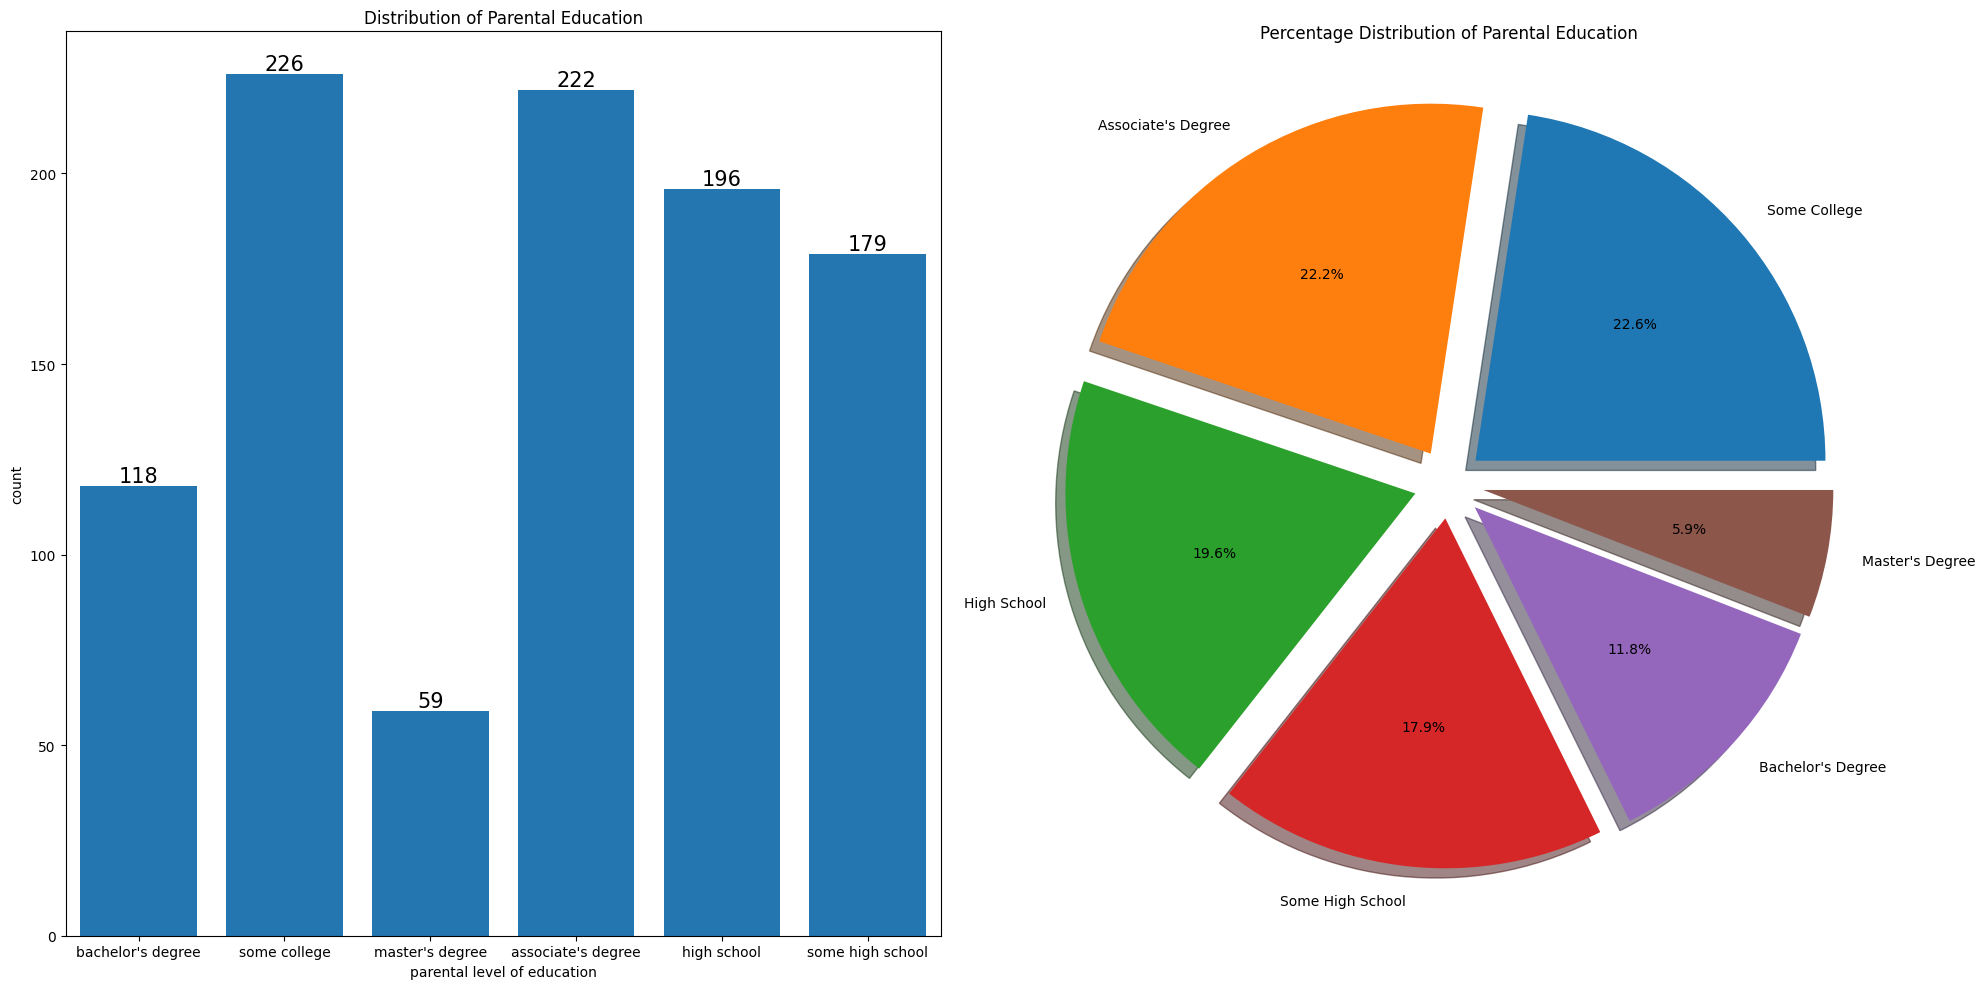

In [30]:
#Univariate analysis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

plt.subplot(121)
plt.title('Distribution of Parental Education')
sns.countplot(data=df, x=df['parental level of education'], saturation=0.95, ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

plt.subplot(122)
plt.title('Percentage Distribution of Parental Education')
plt.pie(x=df['parental level of education'].value_counts(), data=df, labels=['Some College', 'Associate\'s Degree', 'High School', 'Some High School', 'Bachelor\'s Degree', 'Master\'s Degree'],explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],autopct='%1.1f%%',shadow=True)

plt.tight_layout()
plt.show()

Maximum students have parents with an education level from Some College, then associate's degree.

<Figure size 2000x1000 with 0 Axes>

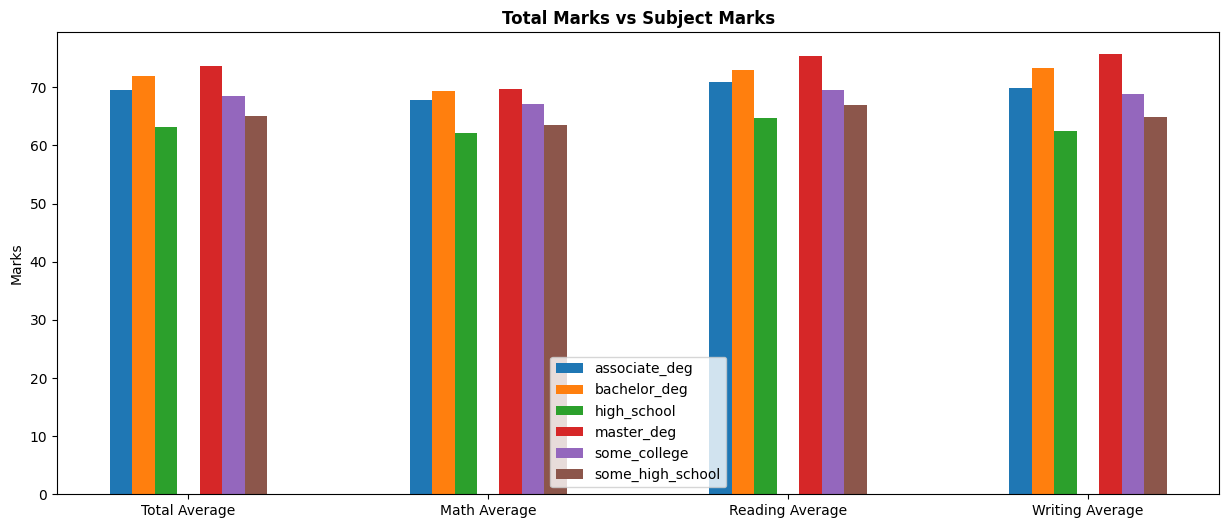

In [37]:
#Bivariate analysis

parental_education_group = df.groupby('parental level of education')

plt.figure(figsize=(20,10))

X = ['Total Average', 'Math Average', 'Reading Average', 'Writing Average']

associate_deg_scores = [parental_education_group['avg_score'].mean()[0], parental_education_group['math score'].mean()[0], parental_education_group['reading score'].mean()[0], parental_education_group['writing score'].mean()[0]]
bachelor_deg_scores = [parental_education_group['avg_score'].mean()[1], parental_education_group['math score'].mean()[1], parental_education_group['reading score'].mean()[1], parental_education_group['writing score'].mean()[1]]
high_school_scores = [parental_education_group['avg_score'].mean()[2], parental_education_group['math score'].mean()[2], parental_education_group['reading score'].mean()[2], parental_education_group['writing score'].mean()[2]]
master_deg_scores = [parental_education_group['avg_score'].mean()[3], parental_education_group['math score'].mean()[3], parental_education_group['reading score'].mean()[3], parental_education_group['writing score'].mean()[3]]
some_college_scores = [parental_education_group['avg_score'].mean()[4], parental_education_group['math score'].mean()[4], parental_education_group['reading score'].mean()[4], parental_education_group['writing score'].mean()[4]]
some_high_school_scores = [parental_education_group['avg_score'].mean()[5], parental_education_group['math score'].mean()[5], parental_education_group['reading score'].mean()[5], parental_education_group['writing score'].mean()[5]]

X_axis = np.arange(len(X)) * 2
bar_width = 0.15 

plt.figure(figsize=(15, 6))
plt.bar(X_axis - 3 * bar_width, associate_deg_scores, width=bar_width, label='associate_deg')
plt.bar(X_axis - 2 * bar_width, bachelor_deg_scores, width=bar_width, label='bachelor_deg')
plt.bar(X_axis - bar_width, high_school_scores, width=bar_width, label='high_school')
plt.bar(X_axis + bar_width, master_deg_scores, width=bar_width, label='master_deg')
plt.bar(X_axis + 2 * bar_width, some_college_scores, width=bar_width, label='some_college')
plt.bar(X_axis + 3 * bar_width, some_high_school_scores, width=bar_width, label='some_high_school')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title('Total Marks vs Subject Marks', fontweight='bold')
plt.legend()
plt.show()

The score of student whose parents possess master and bachelor level education are higher than others.

Univariate and Bivariate analysis of Lunch with marks

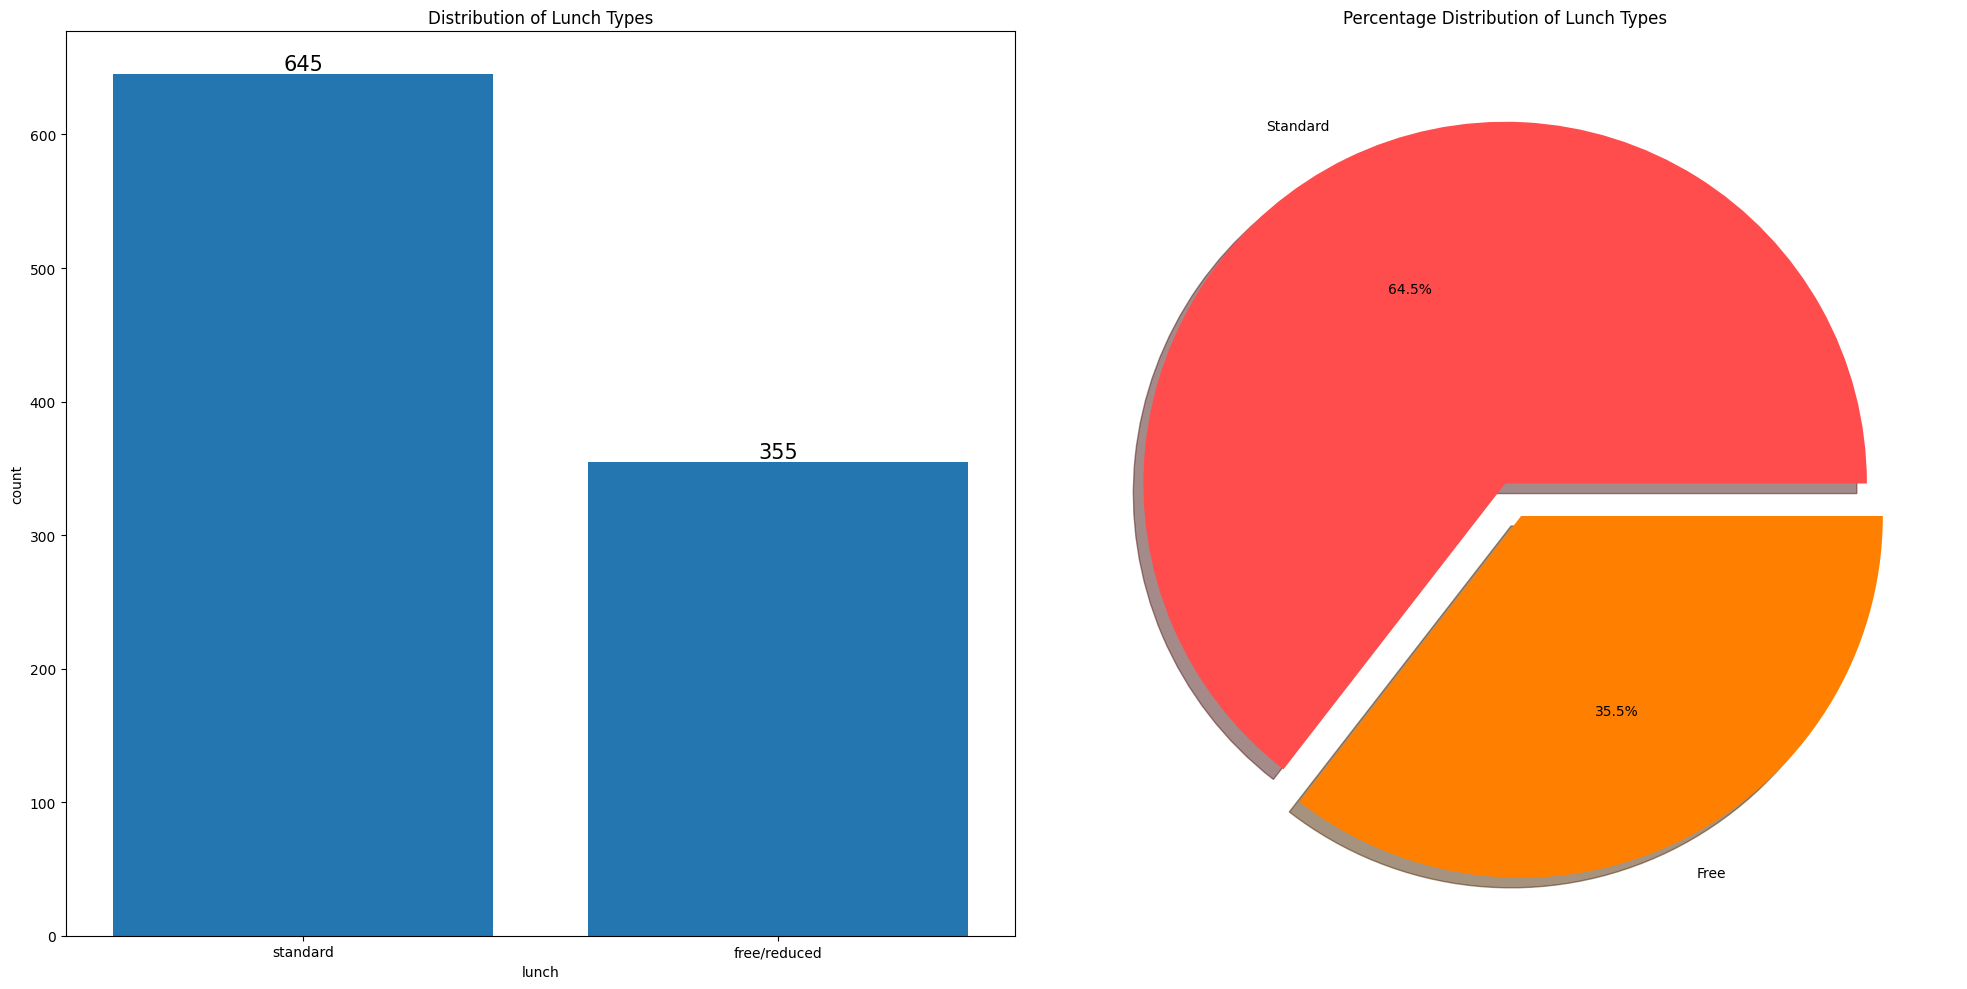

In [39]:
#Univariate Analysis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

plt.subplot(121)
plt.title('Distribution of Lunch Types')
sns.countplot(data=df, x='lunch', saturation=0.95, ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

plt.subplot(122)
plt.title('Percentage Distribution of Lunch Types')
plt.pie(x=df['lunch'].value_counts(), data=df, labels=['Standard', 'Free'],explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=['#ff4d4d','#ff8000'])

plt.tight_layout()
plt.show()

In [40]:
df.groupby('lunch')['avg_score'].mean()

lunch
free/reduced    62.199061
standard        70.837209
Name: avg_score, dtype: float64

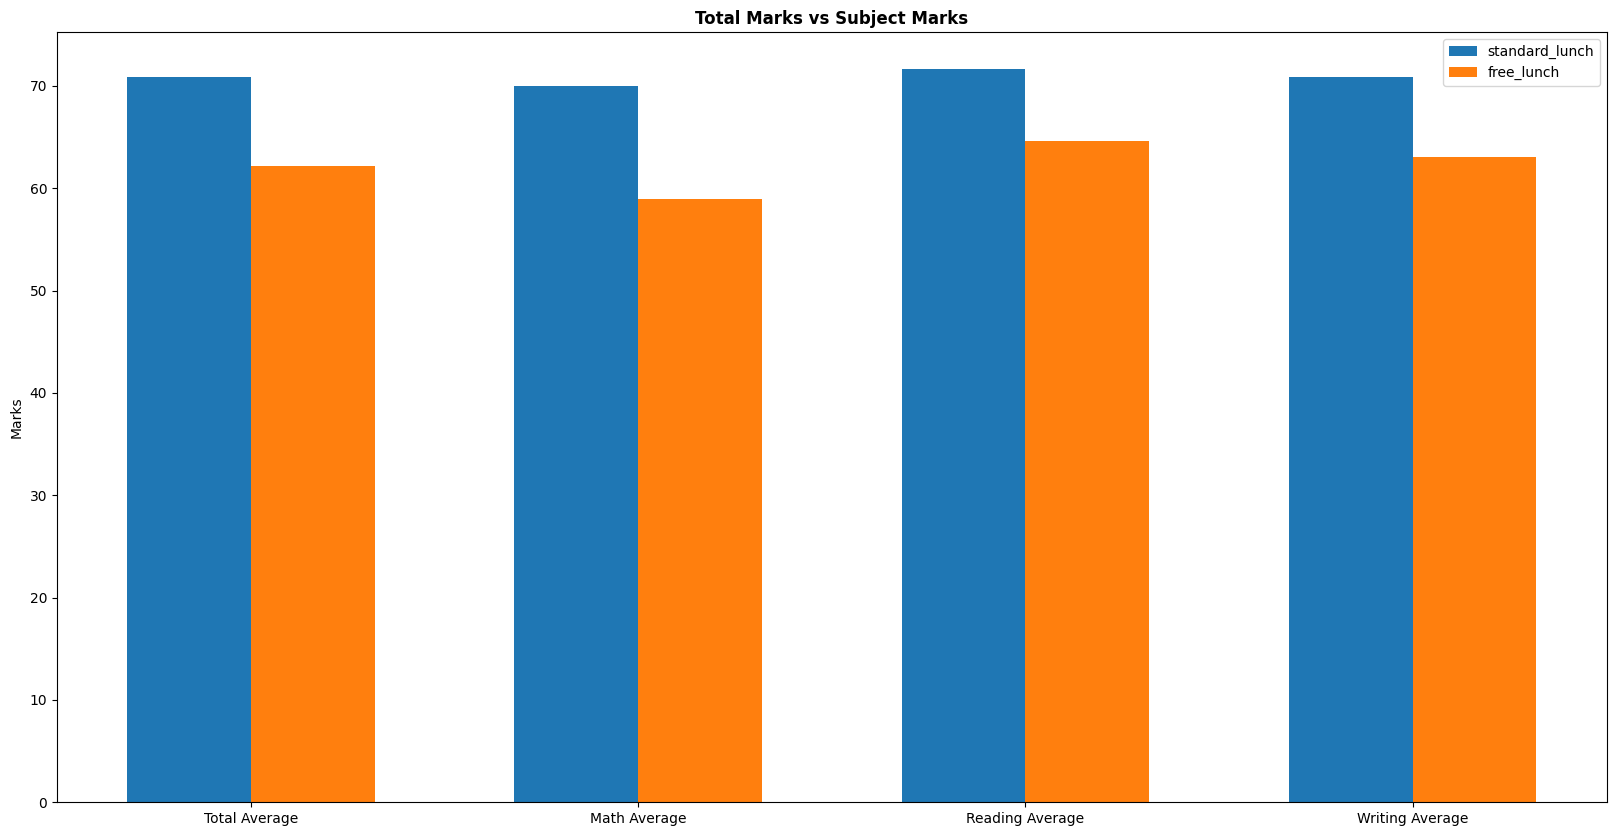

In [41]:
#Bivariate analysis
lunch_group = df.groupby('lunch')

plt.figure(figsize=(20,10))

X = ['Total Average', 'Math Average', 'Reading Average', 'Writing Average']

free_lunch_scores = [lunch_group['avg_score'].mean()[0], lunch_group['math score'].mean()[0], lunch_group['reading score'].mean()[0], lunch_group['writing score'].mean()[0]]
standard_lunch_scores = [lunch_group['avg_score'].mean()[1], lunch_group['math score'].mean()[1], lunch_group['reading score'].mean()[1], lunch_group['writing score'].mean()[1]]

X_axis = np.arange(len(X))*2.5
plt.bar(X_axis - 0.4, standard_lunch_scores, label='standard_lunch')
plt.bar(X_axis + 0.4, free_lunch_scores, label='free_lunch')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title('Total Marks vs Subject Marks', fontweight='bold')
plt.legend()
plt.show()

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

Univariate and Bivariate analysis of Test prep with marks

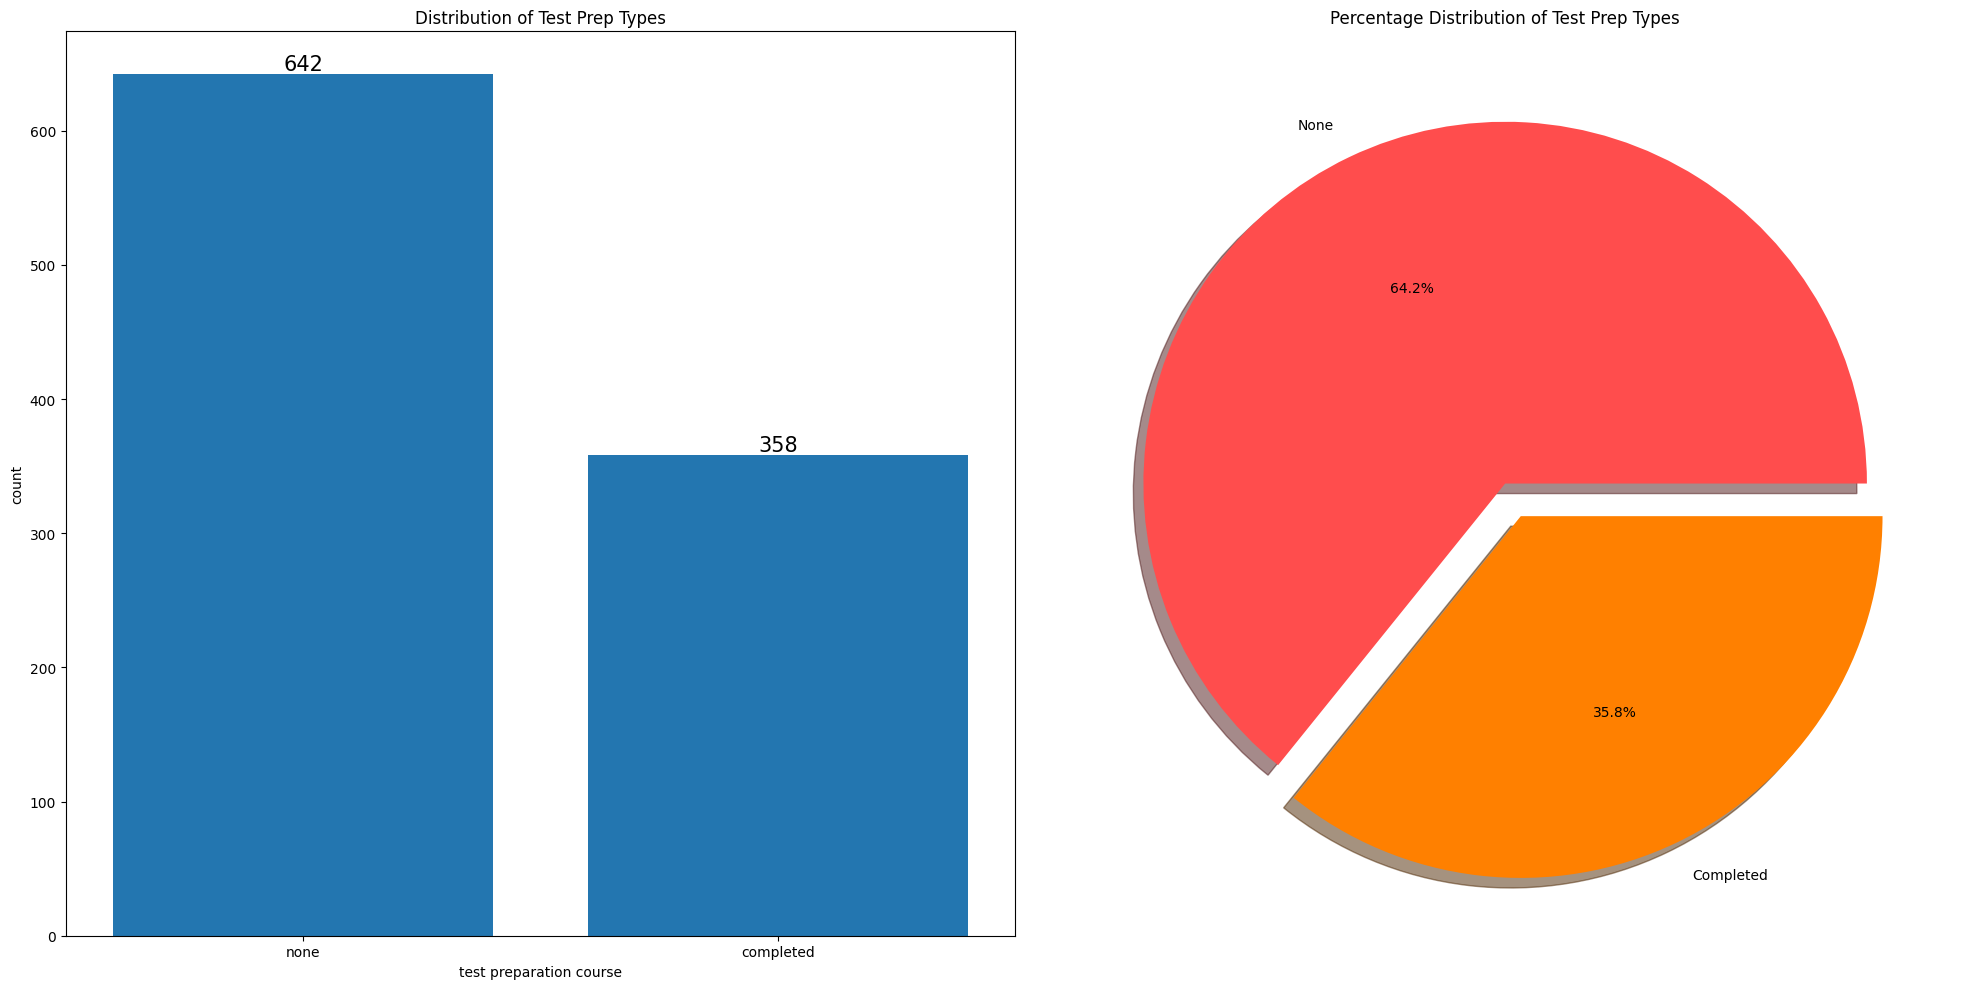

In [43]:
#Univariate analysis
df['test preparation course'].value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

plt.subplot(121)
plt.title('Distribution of Test Prep Types')
sns.countplot(data=df, x='test preparation course', saturation=0.95, ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

plt.subplot(122)
plt.title('Percentage Distribution of Test Prep Types')
plt.pie(x=df['test preparation course'].value_counts(), data=df, labels=['None', 'Completed'],explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=['#ff4d4d','#ff8000'])

plt.tight_layout()
plt.show()

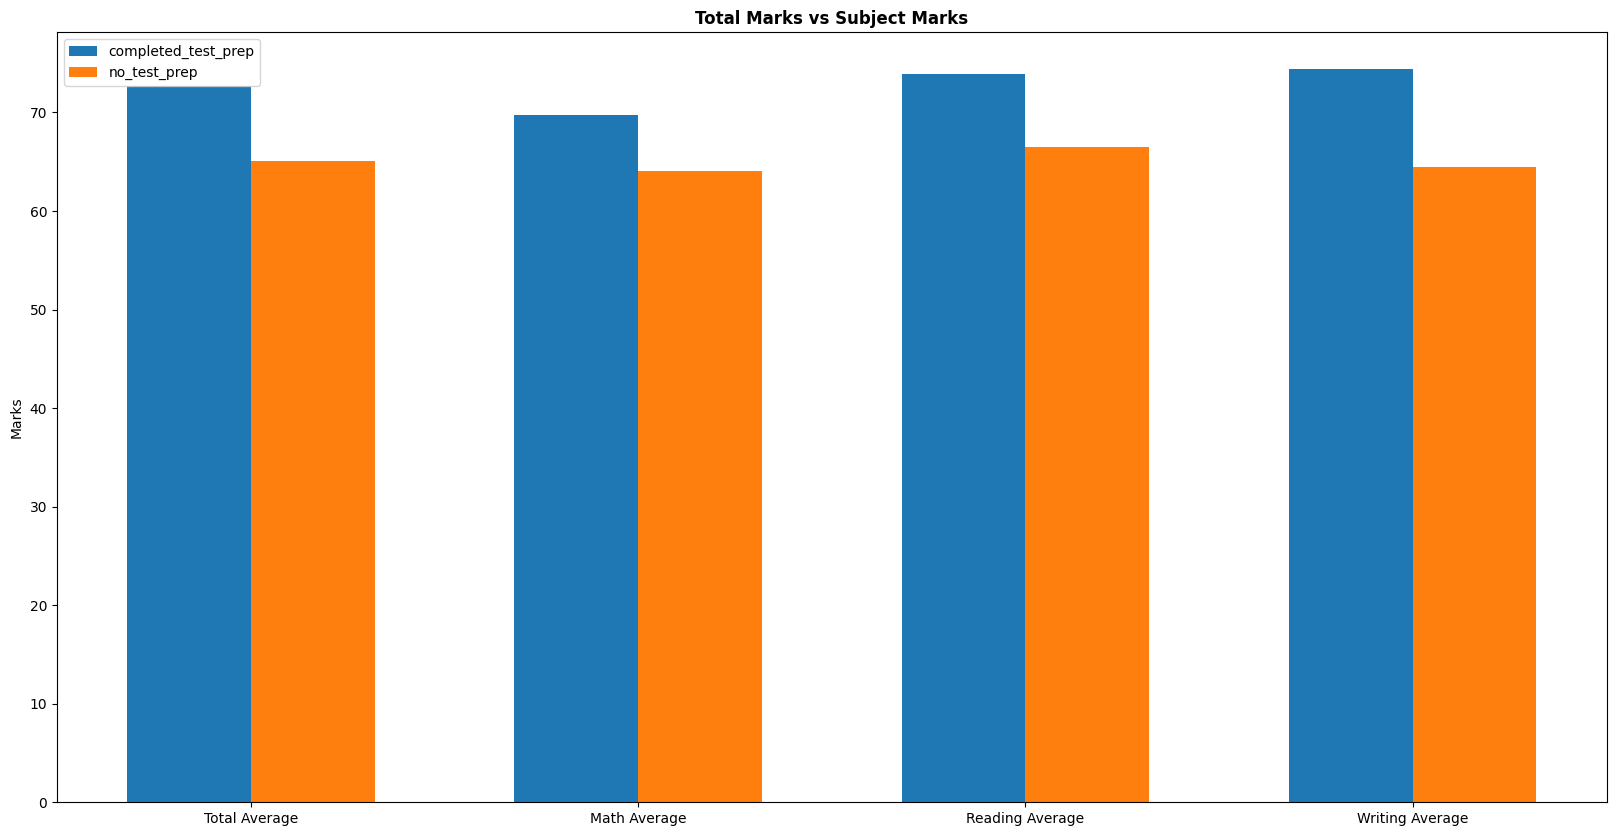

In [45]:
#Bivariate analysis
test_prep_group = df.groupby('test preparation course')

plt.figure(figsize=(20,10))

X = ['Total Average', 'Math Average', 'Reading Average', 'Writing Average']

completed_test_prep_scores = [test_prep_group['avg_score'].mean()[0], test_prep_group['math score'].mean()[0], test_prep_group['reading score'].mean()[0], test_prep_group['writing score'].mean()[0]]
no_test_prep_scores = [test_prep_group['avg_score'].mean()[1], test_prep_group['math score'].mean()[1], test_prep_group['reading score'].mean()[1], test_prep_group['writing score'].mean()[1]]

X_axis = np.arange(len(X))*2.5
plt.bar(X_axis - 0.4, completed_test_prep_scores, label='completed_test_prep')
plt.bar(X_axis + 0.4, no_test_prep_scores, label='no_test_prep')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title('Total Marks vs Subject Marks', fontweight='bold')
plt.legend()
plt.show()

Those students who have taken Test Preparation courses have performed better than those who did not.

Outlier Detection

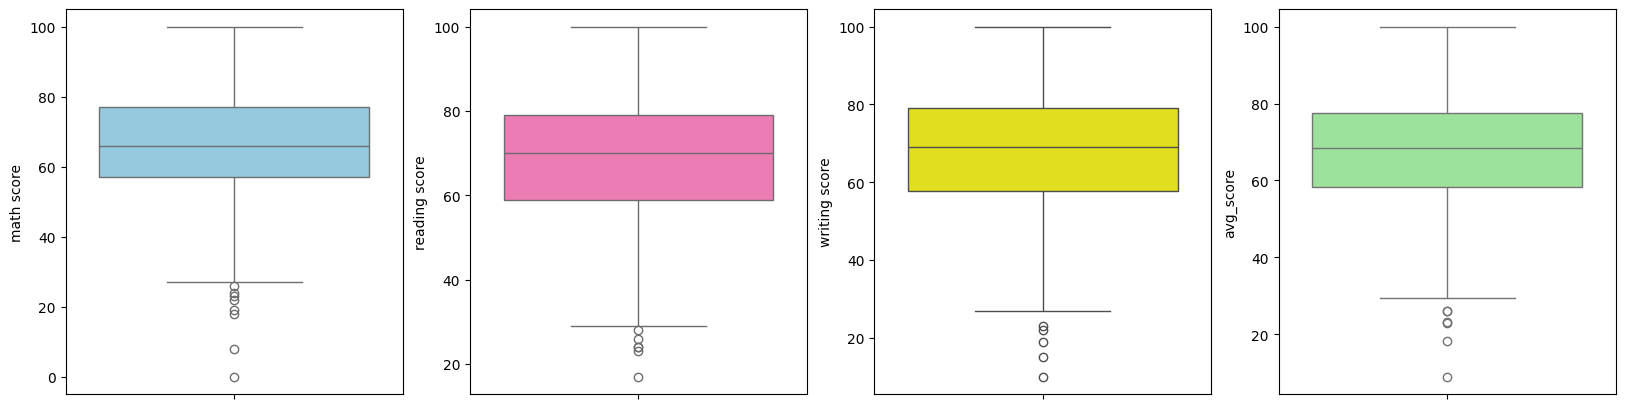

In [47]:
plt.subplots(1,4,figsize=(20,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()

Pairplot analysis

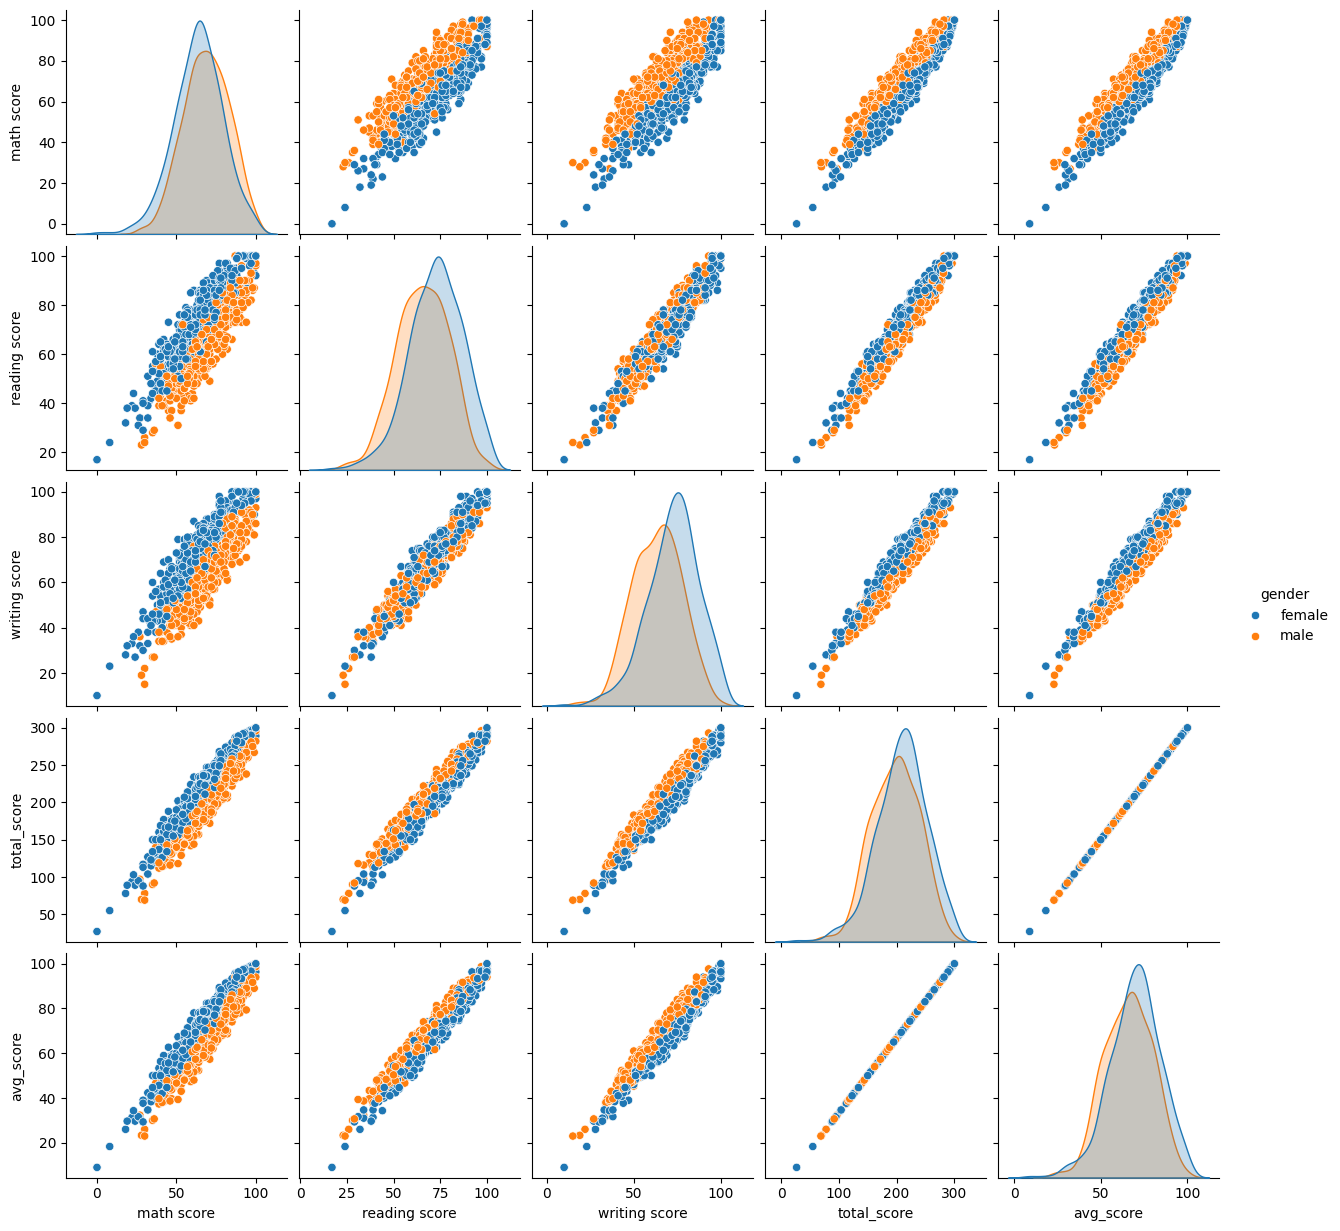

In [50]:
sns.pairplot(df, hue='gender')
plt.show()

[]

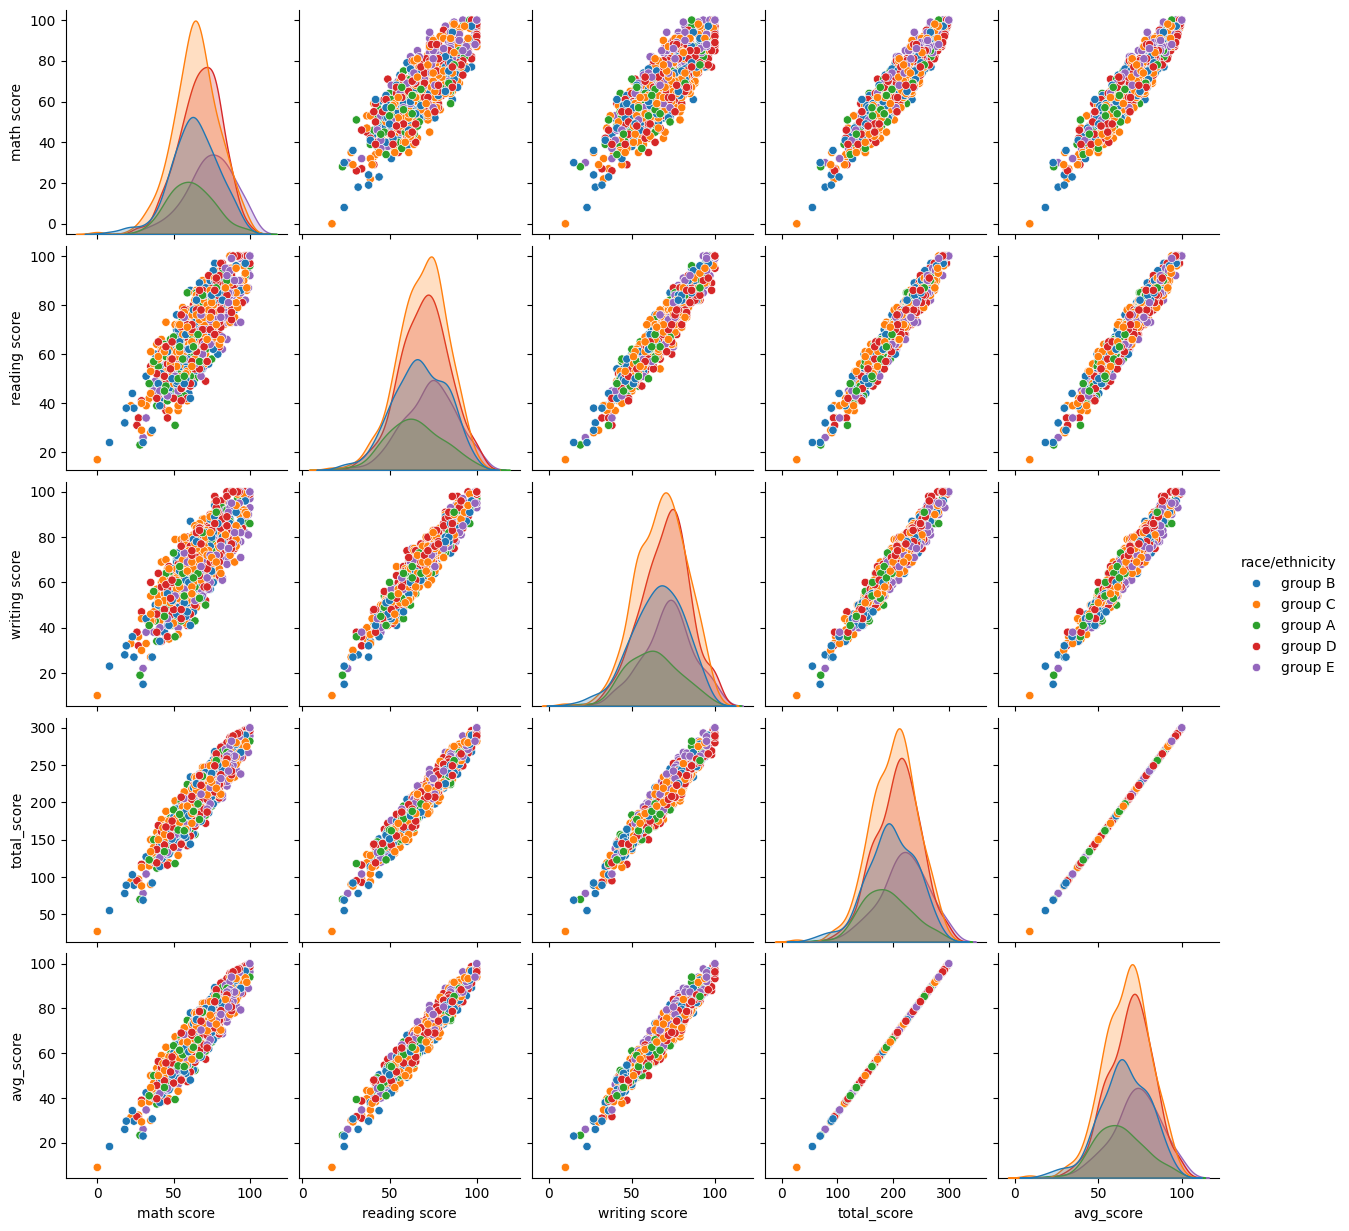

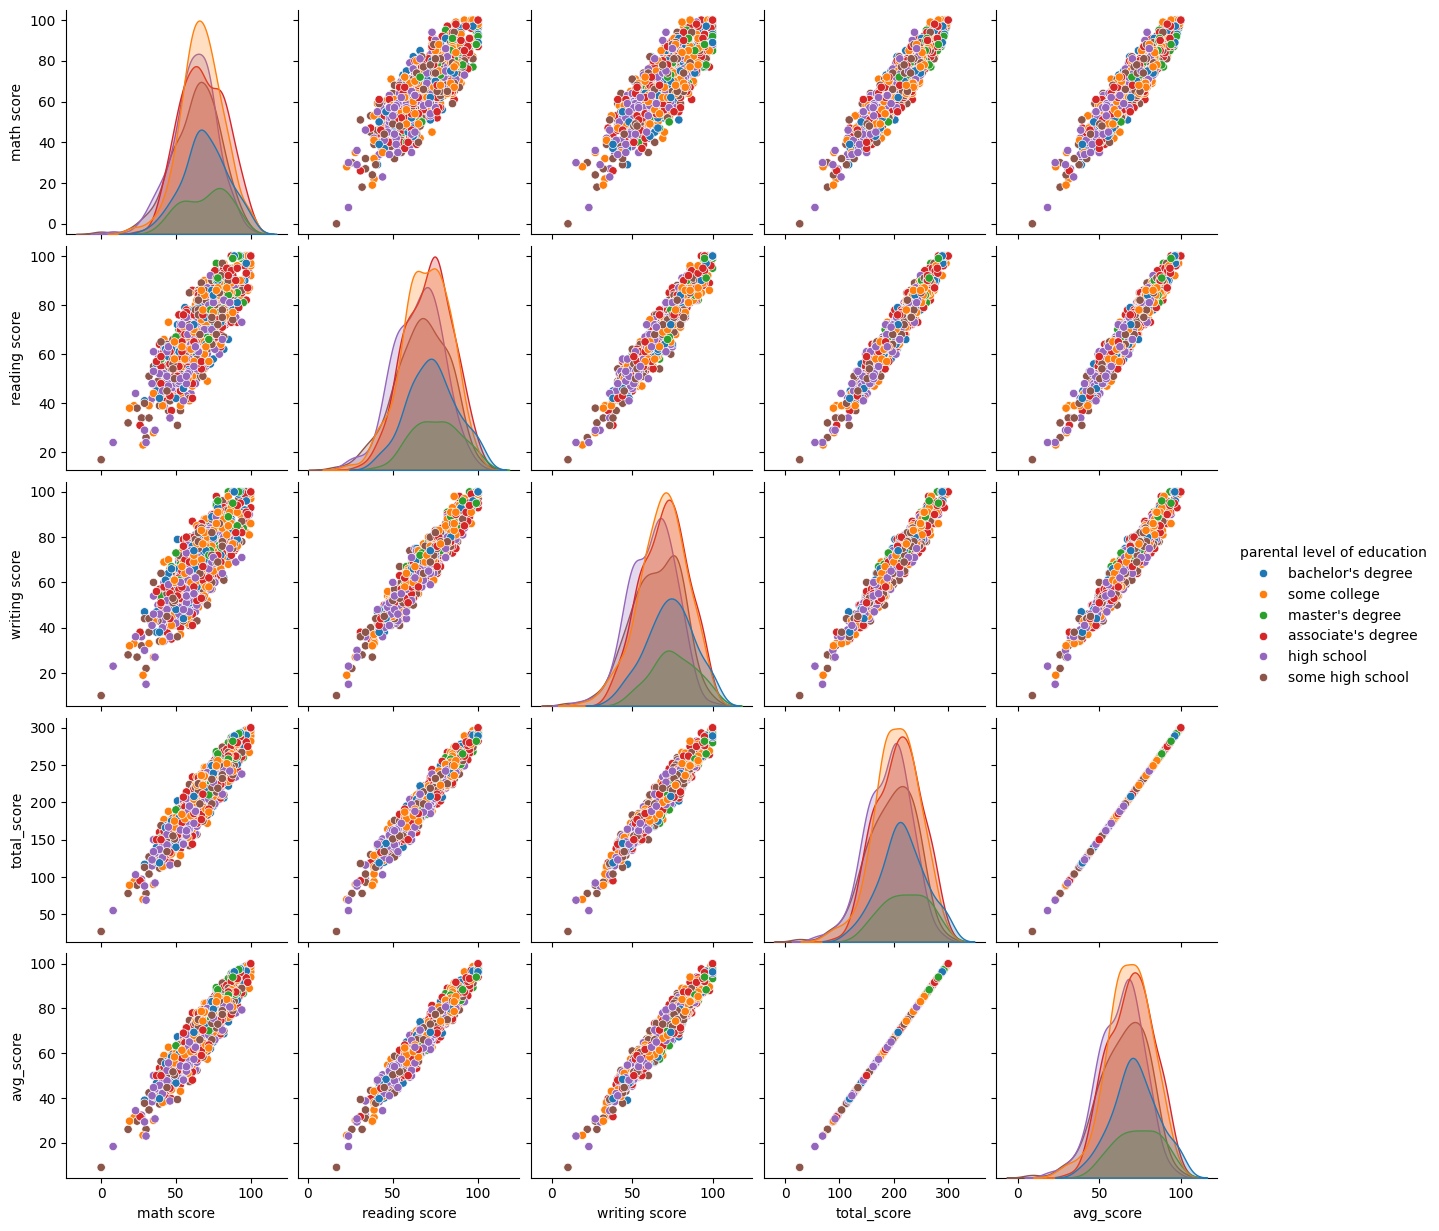

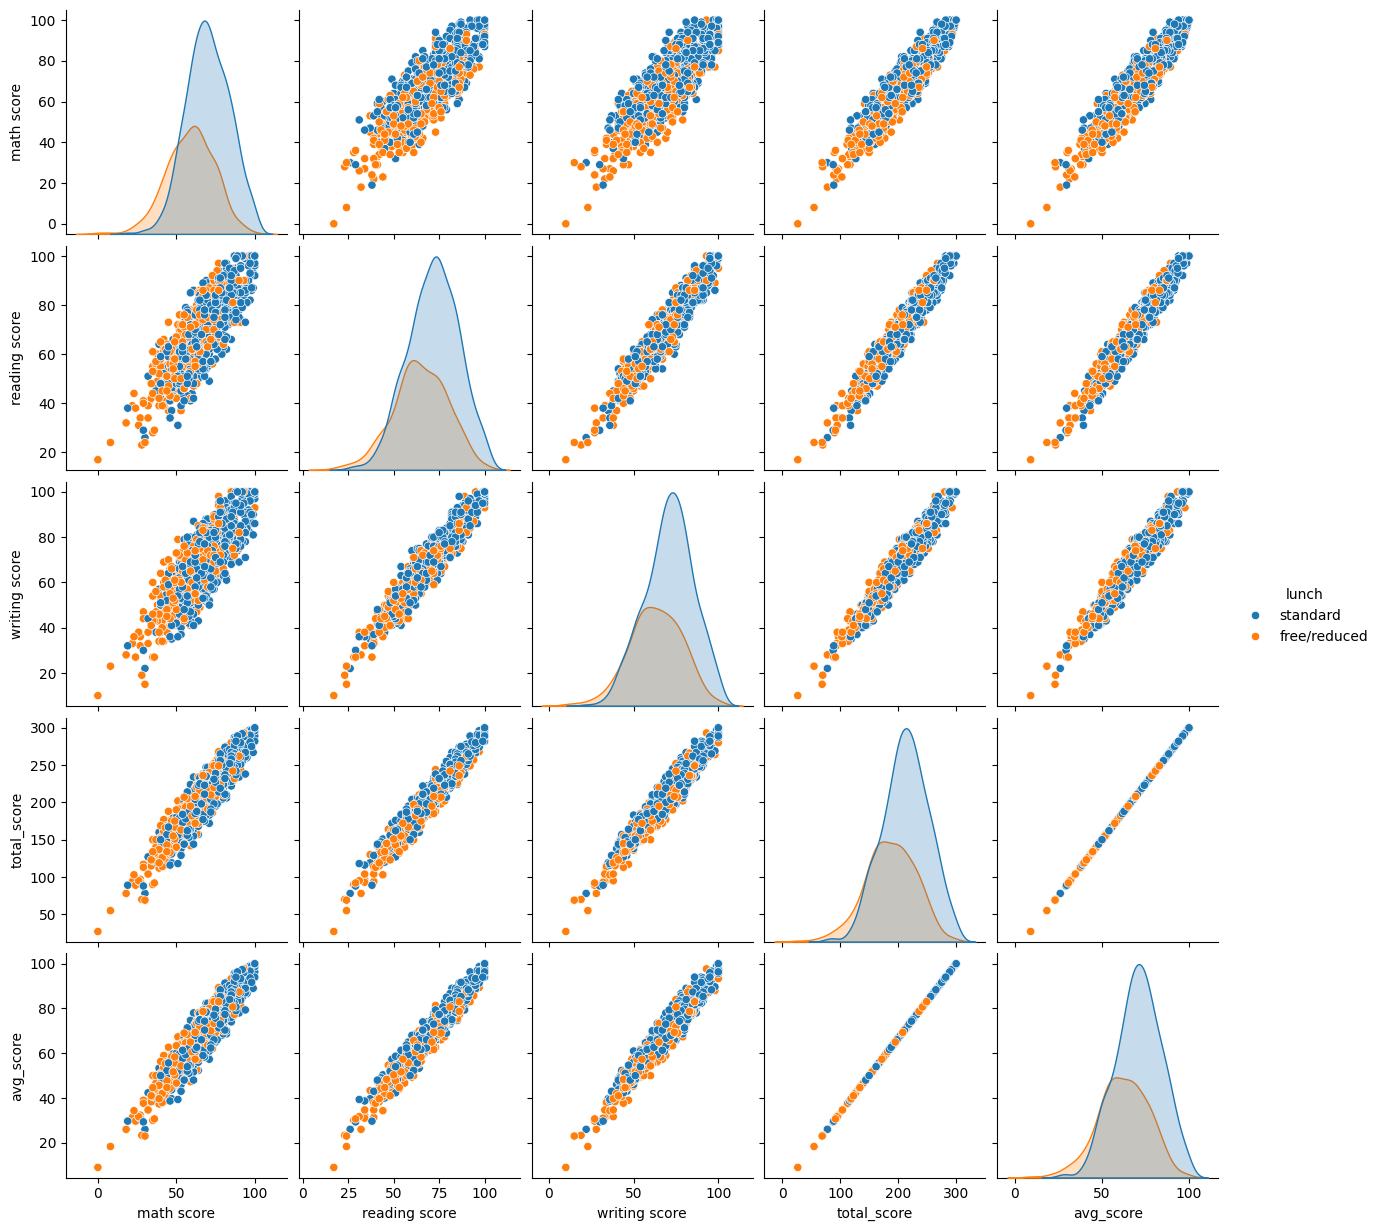

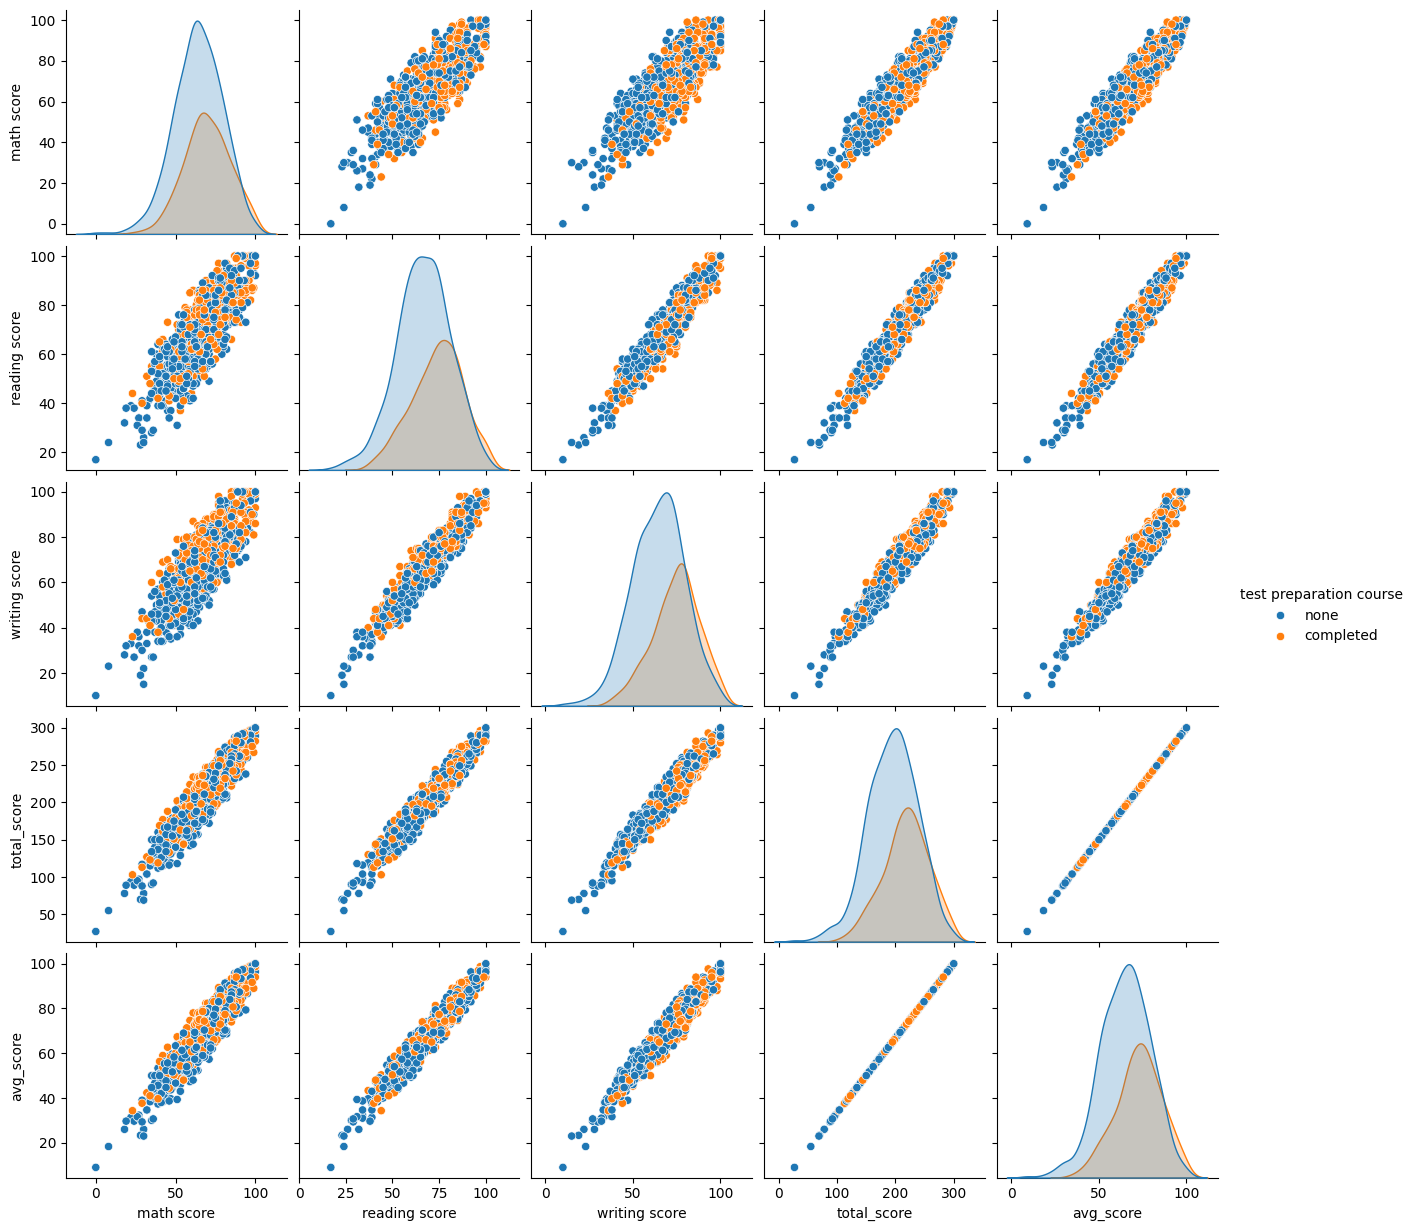

In [53]:
sns.pairplot(df, hue='race/ethnicity')
sns.pairplot(df, hue='parental level of education')
sns.pairplot(df, hue='lunch')
sns.pairplot(df, hue='test preparation course')
plt.plot()

Conclusion:
1. Females are better than males in scoring top marks
2. Marks are directly dependent on Lunch, Test Prep, Parental Edu Level and Ethnicity